# Маркетинговый анализ развлекательного приложения

В данном проекте проводится маркетинговый анализ развлекательного приложения. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Необходимо разобраться в причинах и помочь компании выйти в плюс.

В распоряжении есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года: лог сервера с данными об их посещениях, выгрузка их покупок за этот период и рекламные расходы.

**Цель работы** - определить:
- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.

## 1 Изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pylab import rcParams
from datetime import datetime, timedelta

In [2]:
# настройки для графиков
rcParams['figure.figsize'] = 10, 5

%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-pastel')
sns.set_style('darkgrid')

In [3]:
# открытие файла
visits = pd.read_csv('E:/My documents/Studying/Data_Analyst/Projects/pr_7_entertaining_app/visits_info_short.csv', sep=',')
orders = pd.read_csv('E:/My documents/Studying/Data_Analyst/Projects/pr_7_entertaining_app/orders_info_short.csv', sep=',')
costs = pd.read_csv('E:/My documents/Studying/Data_Analyst/Projects/pr_7_entertaining_app/costs_info_short.csv', sep=',')

In [4]:
# вывод основной информации о датафреймах, подсчет дубликатов и пропусков
df_list = [visits, orders, costs]

def df_info(data: pd.DataFrame):
    print('Первые 10 строк датафрейма')
    display(data.head(10))
    print('Основная информация о датафрейме')
    display(data.info())
    print('Описание данных')
    display(data.describe())
    print('Количество строк-дубликатов')
    display(data.duplicated().sum())
    print('Количество пропусков')
    display(data.isna().sum())
    
for df in df_list:
    df_info(df)

Первые 10 строк датафрейма


User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

Основная информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

Описание данных


User Id
count  3.099010e+05
mean   4.997664e+11
std    2.887899e+11
min    5.993260e+05
25%    2.493691e+11
50%    4.989906e+11
75%    7.495211e+11
max    9.999996e+11

Количество строк-дубликатов


0

Количество пропусков


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Первые 10 строк датафрейма


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

Основная информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

Описание данных


User Id       Revenue
count  4.021200e+04  40212.000000
mean   4.990295e+11      5.370608
std    2.860937e+11      3.454208
min    5.993260e+05      4.990000
25%    2.511324e+11      4.990000
50%    4.982840e+11      4.990000
75%    7.433327e+11      4.990000
max    9.998954e+11     49.990000

Количество строк-дубликатов


0

Количество пропусков


User Id     0
Event Dt    0
Revenue     0
dtype: int64

Первые 10 строк датафрейма


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

Основная информация о датафрейме
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

Описание данных


costs
count  1800.000000
mean     58.609611
std     107.740223
min       0.800000
25%       6.495000
50%      12.285000
75%      33.600000
max     630.000000

Количество строк-дубликатов


0

Количество пропусков


dt         0
Channel    0
costs      0
dtype: int64

На основании полученной информации можно сделать следующие выводы:
- у некоторых столбцов неверно определен тип данных;
- наименования столбцов не соответствуют единому стилю;
- отсутствуют явные дубликаты и пропуски значений в столбцах.

Необходима предобработка данных для устранения вышеуказанных проблем и более детальной обработки столбцов.

## 2 Предобработка данных

In [5]:
# приведение названий столбцов к правильному стилю
visits.columns = [col.lower().replace(' ', '_') for col in visits.columns]
orders.columns = [col.lower().replace(' ', '_') for col in orders.columns]
costs.columns = costs.columns.str.lower()

In [6]:
# изменение типа данных у столбцов с датой и временем
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [7]:
# подсчет уникальных значений в столбце со страной пользователя
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [8]:
# подсчет уникальных значений в столбце с типом устройства пользователя
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [9]:
# подсчет уникальных значений в столбце с идентификатором источника перехода
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [10]:
# подсчет уникальных значений в столбце с идентификатором рекламного источника
costs['channel'].value_counts()

FaceBoom              180
MediaTornado          180
RocketSuperAds        180
TipTop                180
YRabbit               180
AdNonSense            180
LeapBob               180
OppleCreativeMedia    180
WahooNetBanner        180
lambdaMediaAds        180
Name: channel, dtype: int64

Таким образом, в данном разделе были изменены типы данных в столбцах датафреймов для корректной работы с датой и временем, названия столбцов были приведены к правильному стилю для удобства работы.

Дубликаты и пропущенные назначения во всех трех датафреймах отсутствуют.

Кроме того, были рассмотрены уникальные значения столбцов со страной пользователя, типом устройства и идентификаторами источника перехода и рекламного источника.

## 3 Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии

### Функция для создания пользовательских профилей

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция для сглаживания фрейма

In [12]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

### Функции для расчета и визуализации удержания

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [14]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

### Функции для расчета и визуализации конверсии

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [16]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Функции для расчета и визуализации LTV и ROI

In [17]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## 4 Исследовательский анализ данных

Составим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, заказах и расходах на рекламу.

In [19]:
# получение профилей пользователей
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False          0.000000  
6  2019-08-16 2019-08-01  False          0.000000  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

In [20]:
# определение минимальной и максимальной даты привлечения пользователей
print('Минимальная дата:', profiles['dt'].min())
print('Максимальная дата:', profiles['dt'].max())

Минимальная дата: 2019-05-01
Максимальная дата: 2019-10-27


Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [21]:
# построение таблицы, отражающей количество пользователей и долю платящих из каждой страны
pr_regions = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
pr_regions.columns = ['users_count', 'payers_count', 'payers_share']
pr_regions.sort_values(by='users_count', ascending=False)

users_count  payers_count  payers_share
region                                                
United States       100002          6902      0.069019
UK                   17575           700      0.039829
France               17450           663      0.037994
Germany              14981           616      0.041119

Пользователи приходят в приложение из 4 стран: США, Великобритания, Германия и Франция. Лидером и по количеству пользователей, и по доле платящих являются Соединенные Штаты Америки.

Определим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [22]:
# построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства
pr_devices = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
pr_devices.columns = ['users_count', 'payers_count', 'payers_share']
pr_devices.sort_values(by='users_count', ascending=False)

users_count  payers_count  payers_share
device                                          
iPhone         54479          3382      0.062079
Android        35032          2050      0.058518
PC             30455          1537      0.050468
Mac            30042          1912      0.063644

Клиенты пользуются iPhone, Android, PC и Mac. По количеству пользователей с большим отрывом лидирует iPhone, наибольшая доля платящих пользователей у Mac (6.4%) и iPhone (6.2%).

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей.

In [23]:
# построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения
pr_channeles = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
pr_channeles.columns = ['users_count', 'payers_count', 'payers_share']
pr_channeles.sort_values(by='users_count', ascending=False)

users_count  payers_count  payers_share
channel                                                    
organic                   56439          1160      0.020553
FaceBoom                  29144          3557      0.122049
TipTop                    19561          1878      0.096007
OppleCreativeMedia         8605           233      0.027077
LeapBob                    8553           262      0.030633
WahooNetBanner             8553           453      0.052964
RocketSuperAds             4448           352      0.079137
MediaTornado               4364           156      0.035747
YRabbit                    4312           165      0.038265
AdNonSense                 3880           440      0.113402
lambdaMediaAds             2149           225      0.104700

Самое большое количество пользователей пришло из канала "organic", но больше всего платящих пользователей было привлечено благодаря каналу FaceBoom (12,2%).

## 5 Маркетинг

Посчитаем общую сумму расходов на маркетинг.

In [24]:
# расчет общей суммы расходов на рекламу
costs.costs.sum().round(1)

105497.3

Проанализируем распределение затрат по рекламным источникам.

In [25]:
# построение таблицы, отражающей сумму расходов по каждому каналу привлечения
ch_costs = costs.groupby('channel').agg({'costs': 'sum'})
ch_costs.sort_values(by='costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

In [26]:
# добавление столбцов с номерами месяца и недели
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

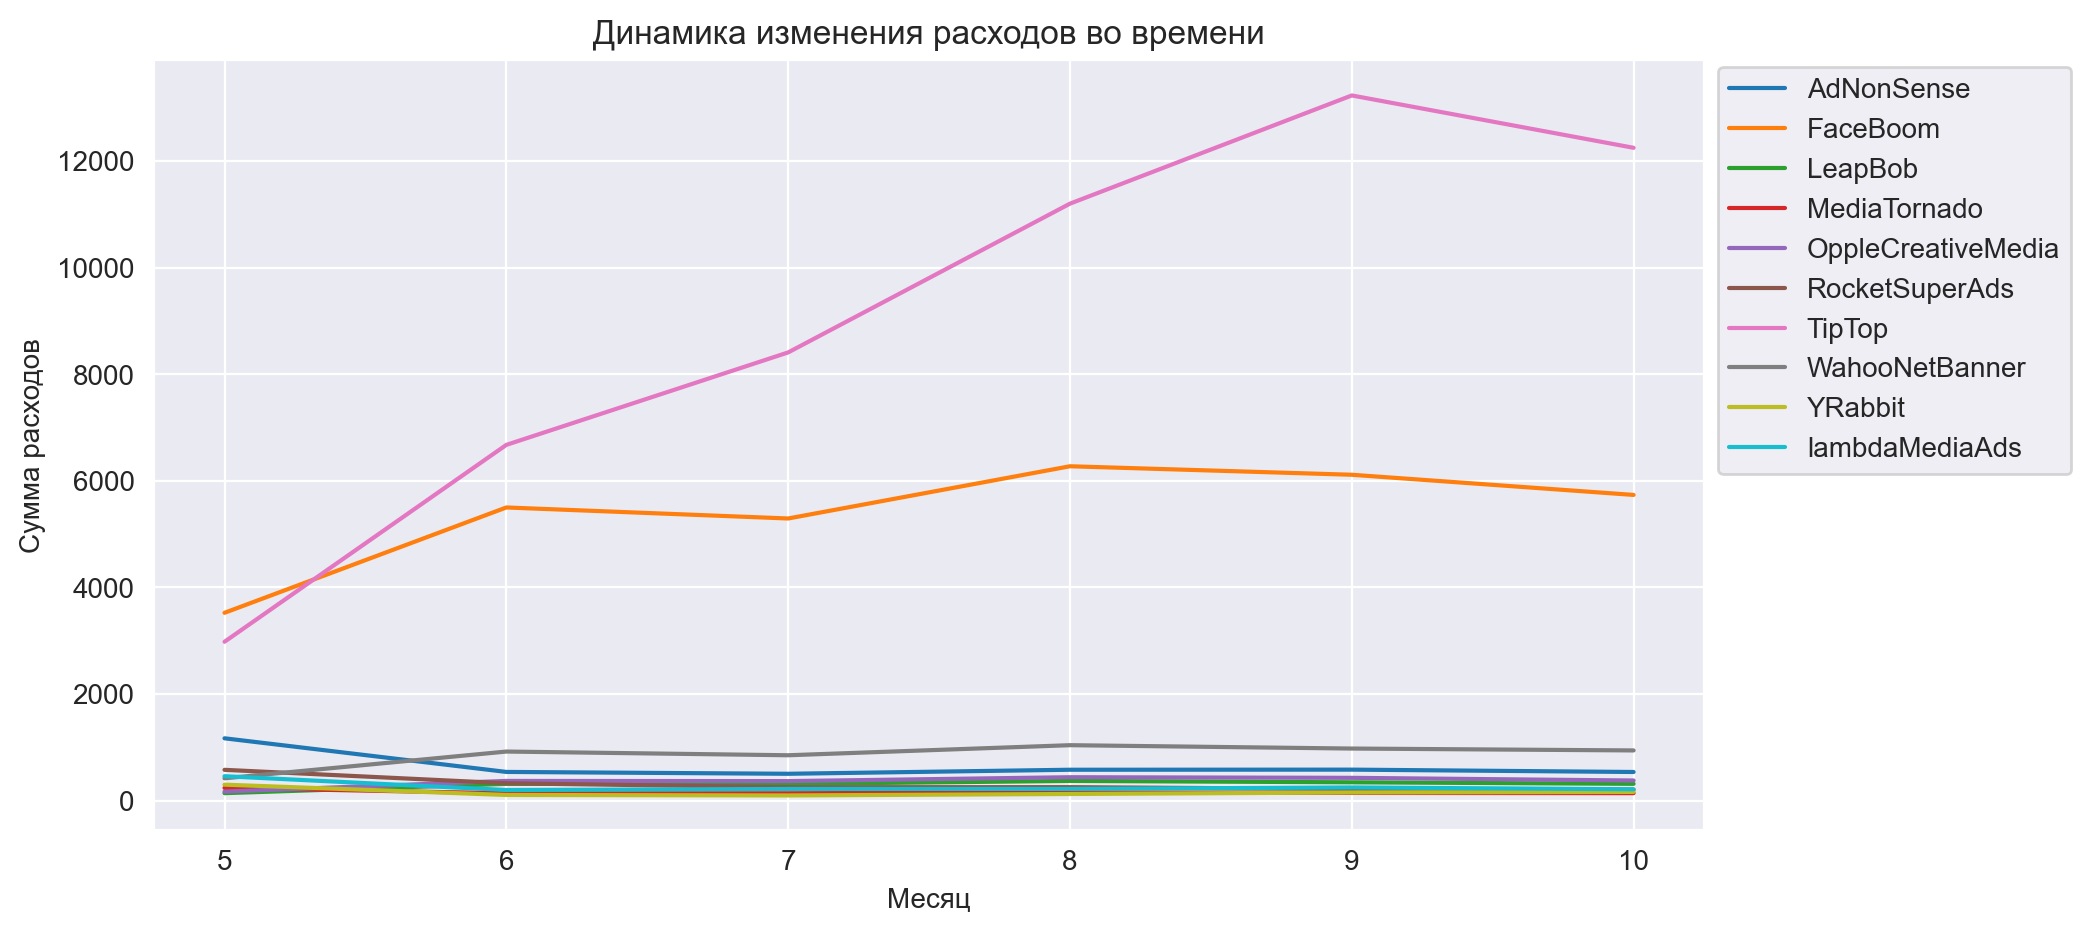

In [27]:
# построение графика динамики изменения расходов по рекламным источникам по месяцам
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Динамика изменения расходов во времени')
plt.xlabel('Месяц')
plt.ylabel('Сумма расходов')
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show();

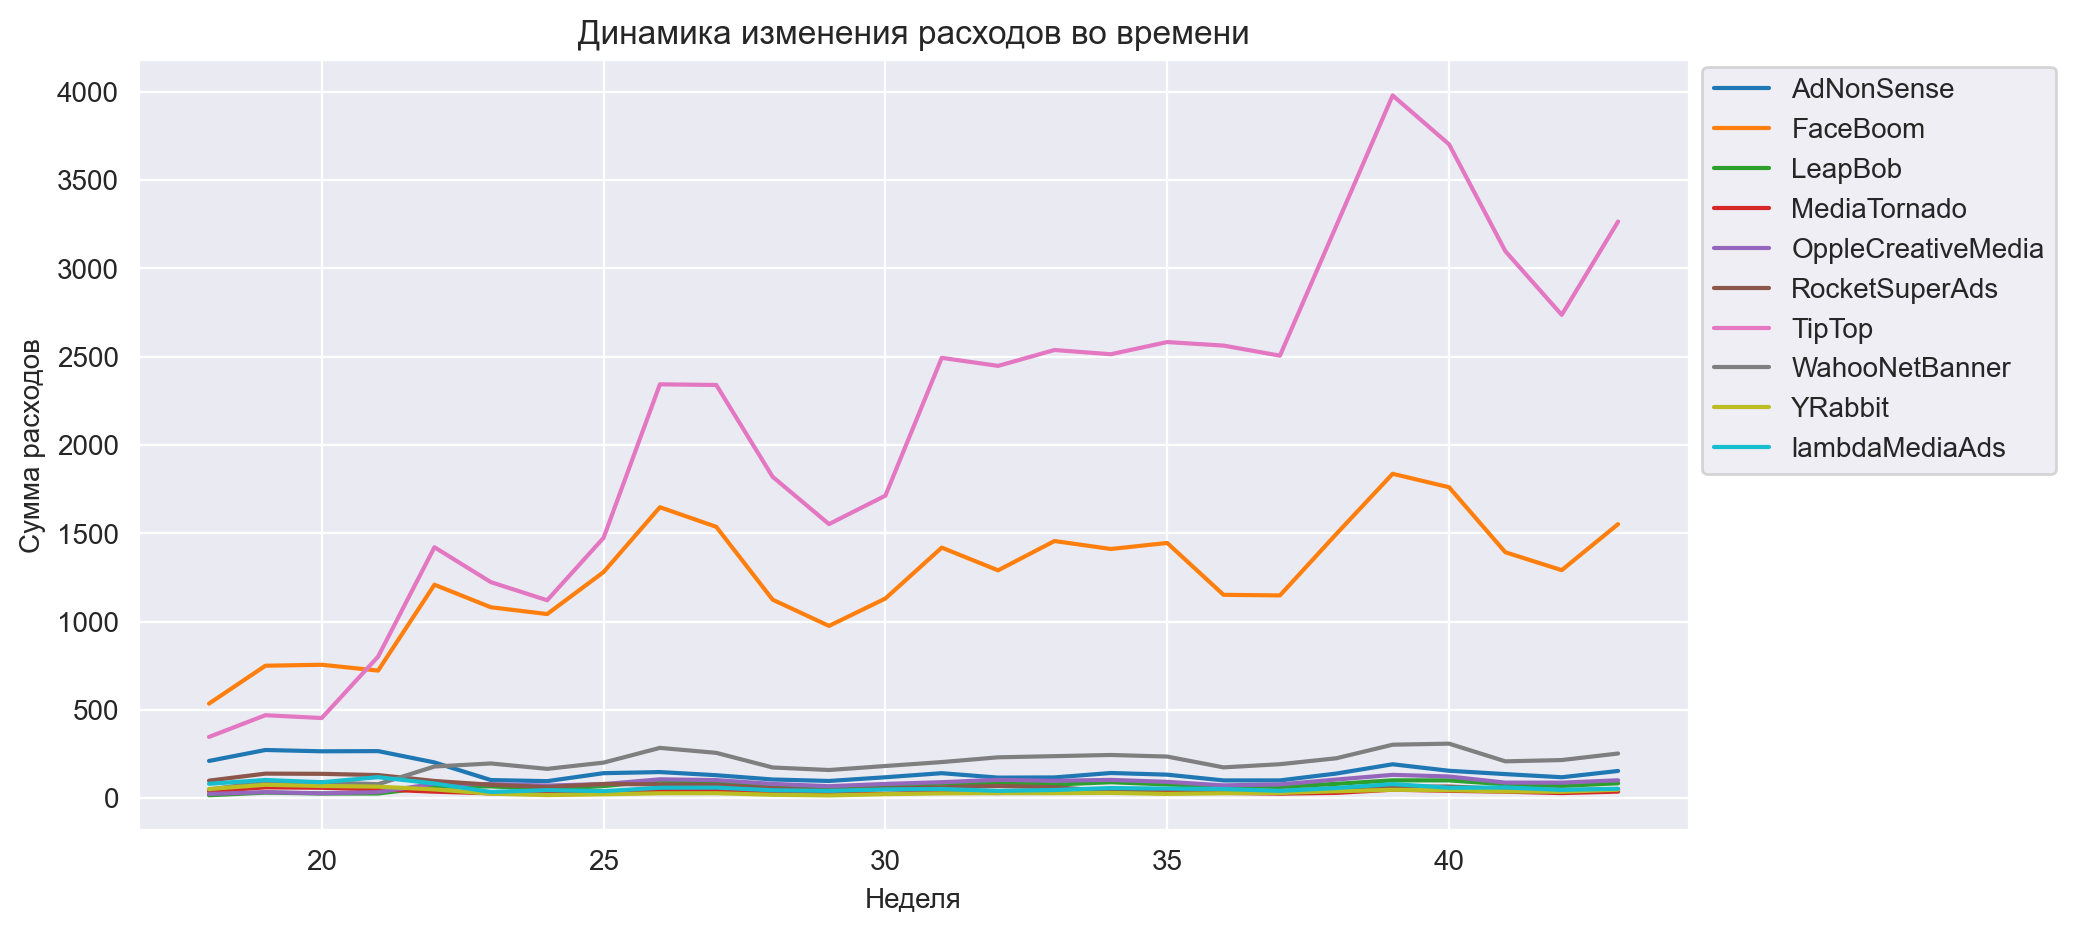

In [28]:
# построение графика динамики изменения расходов по рекламным источникам по неделям
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.title('Динамика изменения расходов во времени')
plt.xlabel('Неделя')
plt.ylabel('Сумма расходов')
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show();

По суммам расходов лидируют TipTop и FaceBoom, что подтверждается графиками. Кроме того, расходы по TipTop плавно росли с течением времени с пиковым значением в сентябре 2019 г. Суммы расходов на остальные рекламные источники значительно меньше и стабильнее.

Определим, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [29]:
# построение таблицы, отражающей среднее значение стоимости привлечения одного клиента по каждому каналу привлечения
pr_cac = profiles.groupby('channel').agg({'acquisition_cost': 'mean'})
pr_cac.sort_values(by='acquisition_cost', ascending=False)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Самое высокое значение стоимости привлечения одного клиента у рекламного источника TipTop.

Таким образом, бОльшую часть расходов (больше 50% от общей суммы) было потрачено на рекламный источник TipTop. По результатам рассмотрения динамики рекламных расходов по неделям и месяцам, было выявлено, что наблюдалось постепенное увеличение сумм данного источника, тогда как остальные рекламные источники относительно стабильные.

## 6 Оценка окупаемости рекламы

In [30]:
# определение момента и горизонта анализа
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14 

Для проведения более качественного анализа уберем из датафрейма с профилями пользователей, привлеченных из канала "organic", т.к. расходы на данный источник равны нулю.

In [31]:
# удаление из датафрейма органических пользователей 
profiles = profiles.query('channel != "organic"')

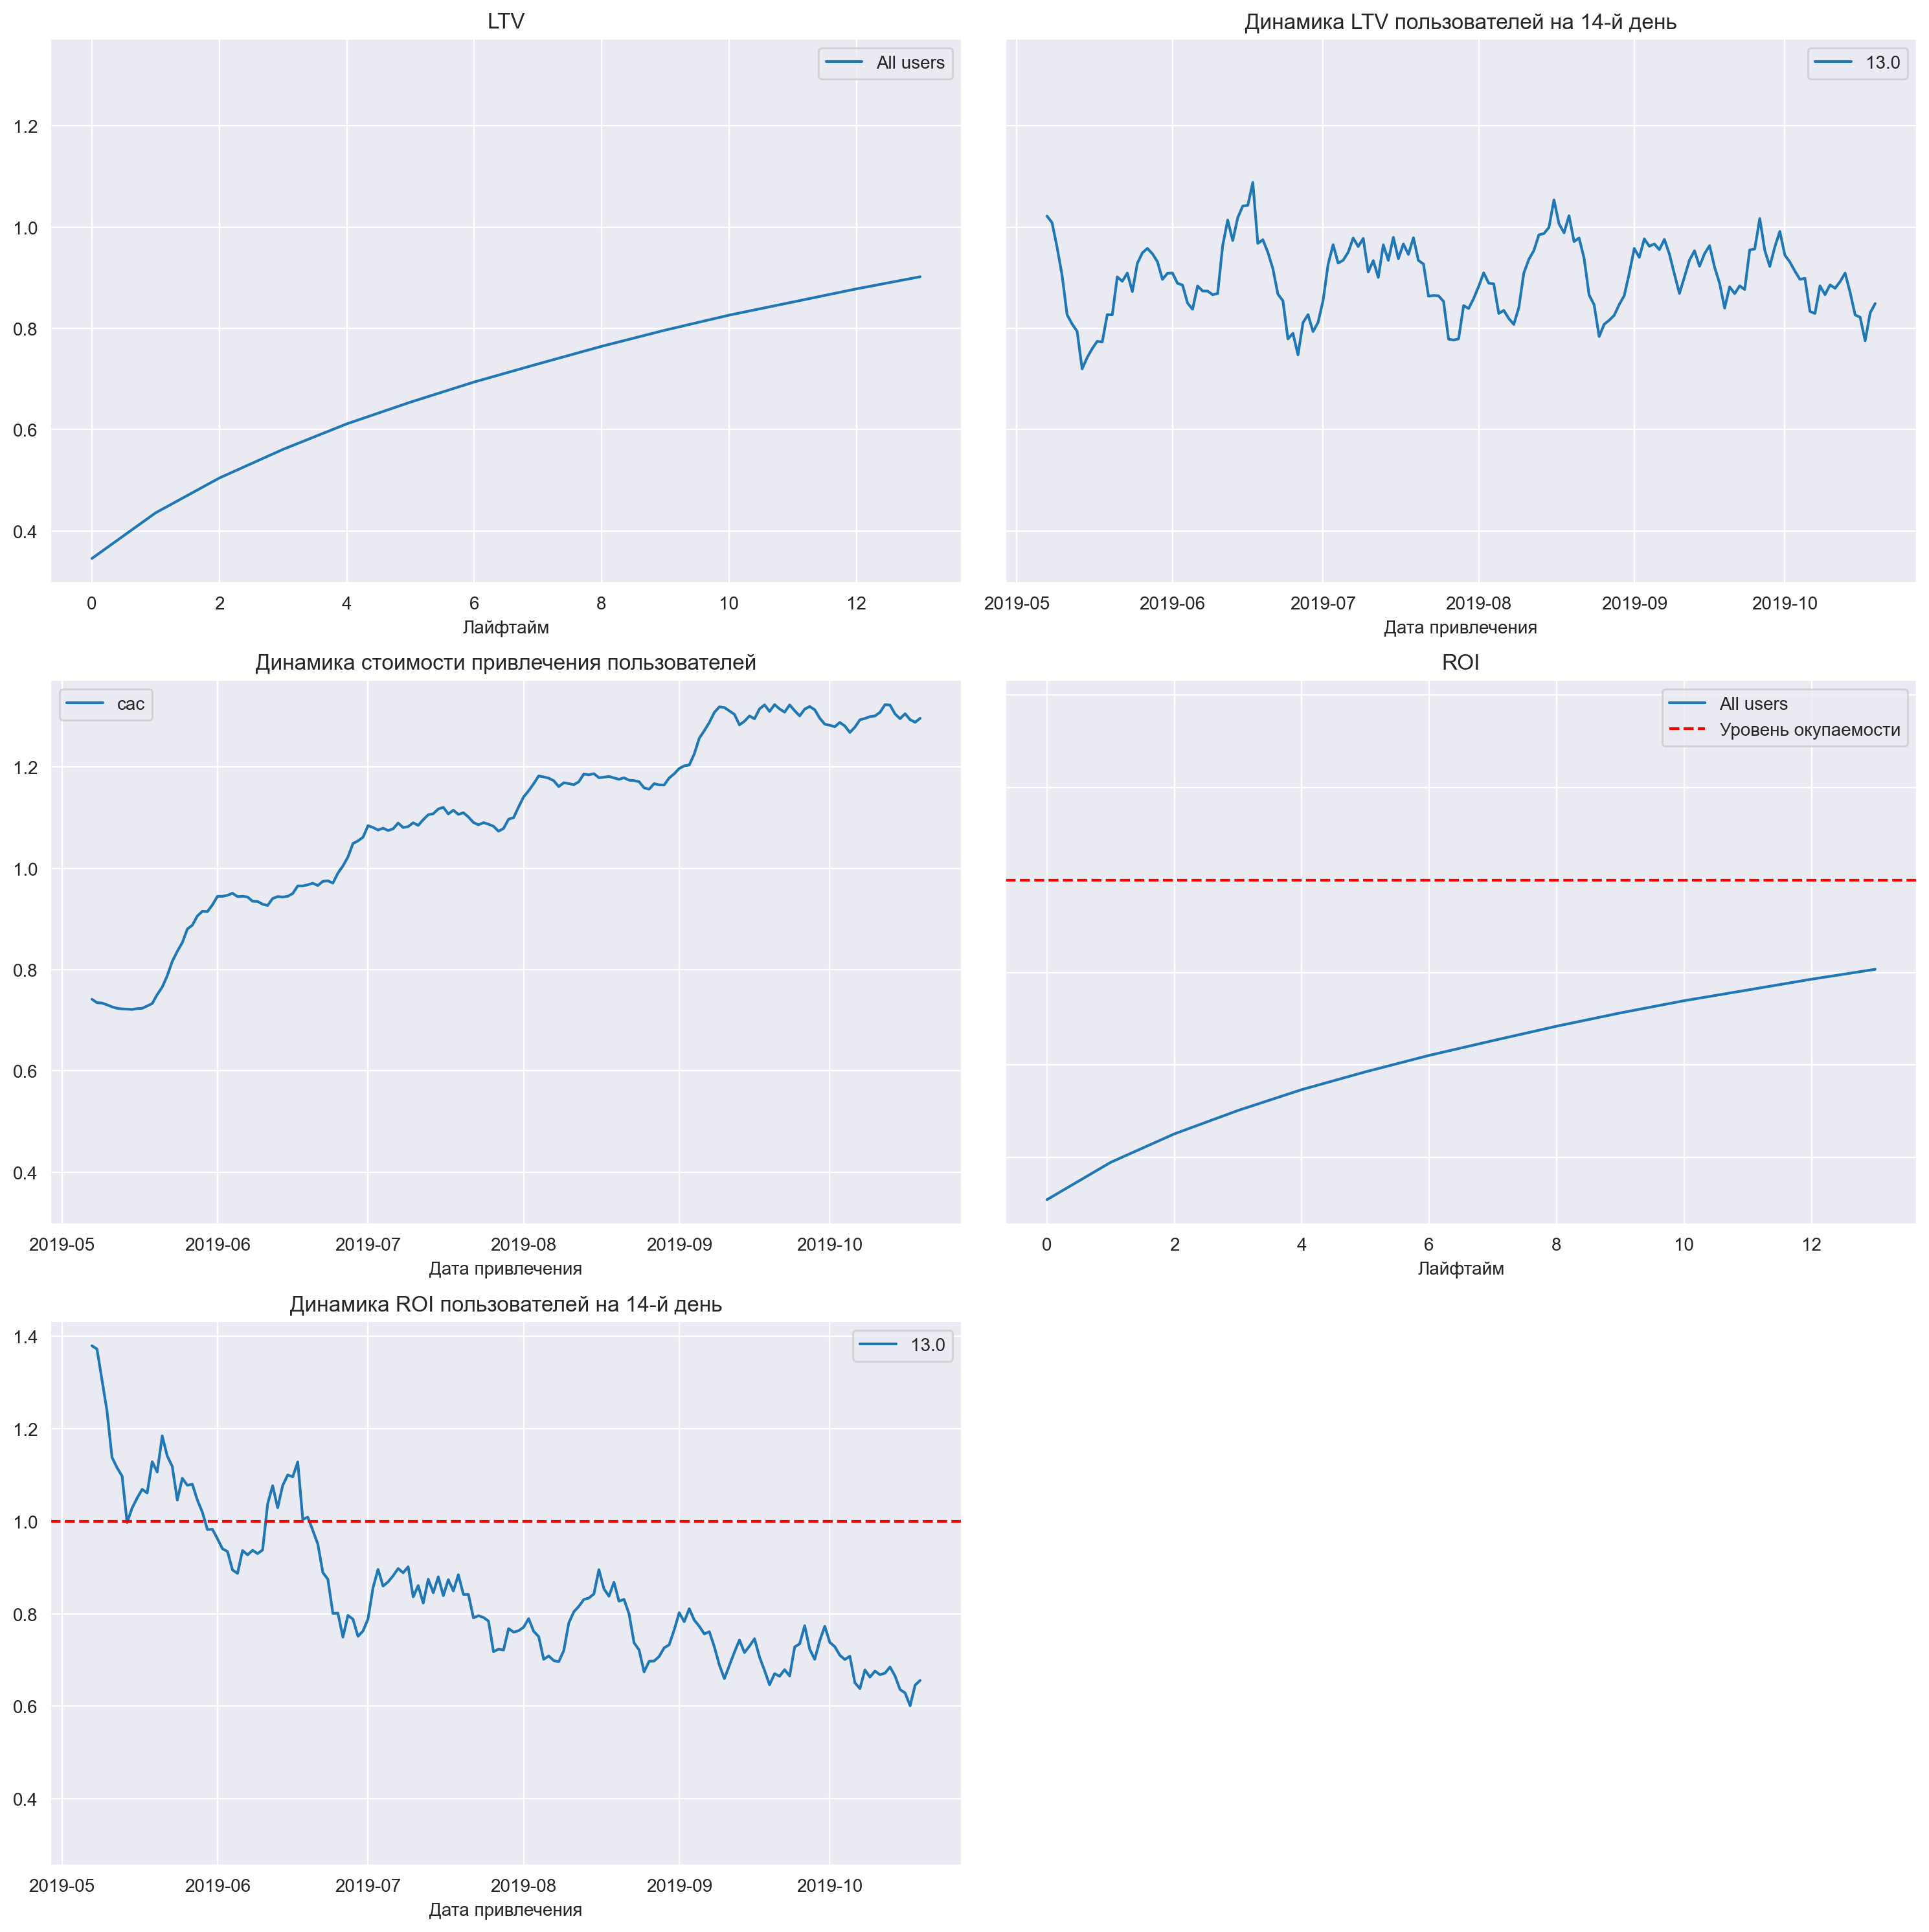

In [32]:
# расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

# построение графиков
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Итак, на основании построенных графиков можно сделать следующие выводы:
- "пожизненная ценность" клиента (LTV) стабильно растет;
- стоимость привлечения пользователей (CAC) с каждым месяцем растет;
- при этом реклама не окупается, т.к. ROI меньше уровня окупаемости;
- начиная с июня, ROI пользователей на 14-ый день лайфтайма с каждым месяцем снижается.

### Окупаемость рекламы с разбивкой по устройствам

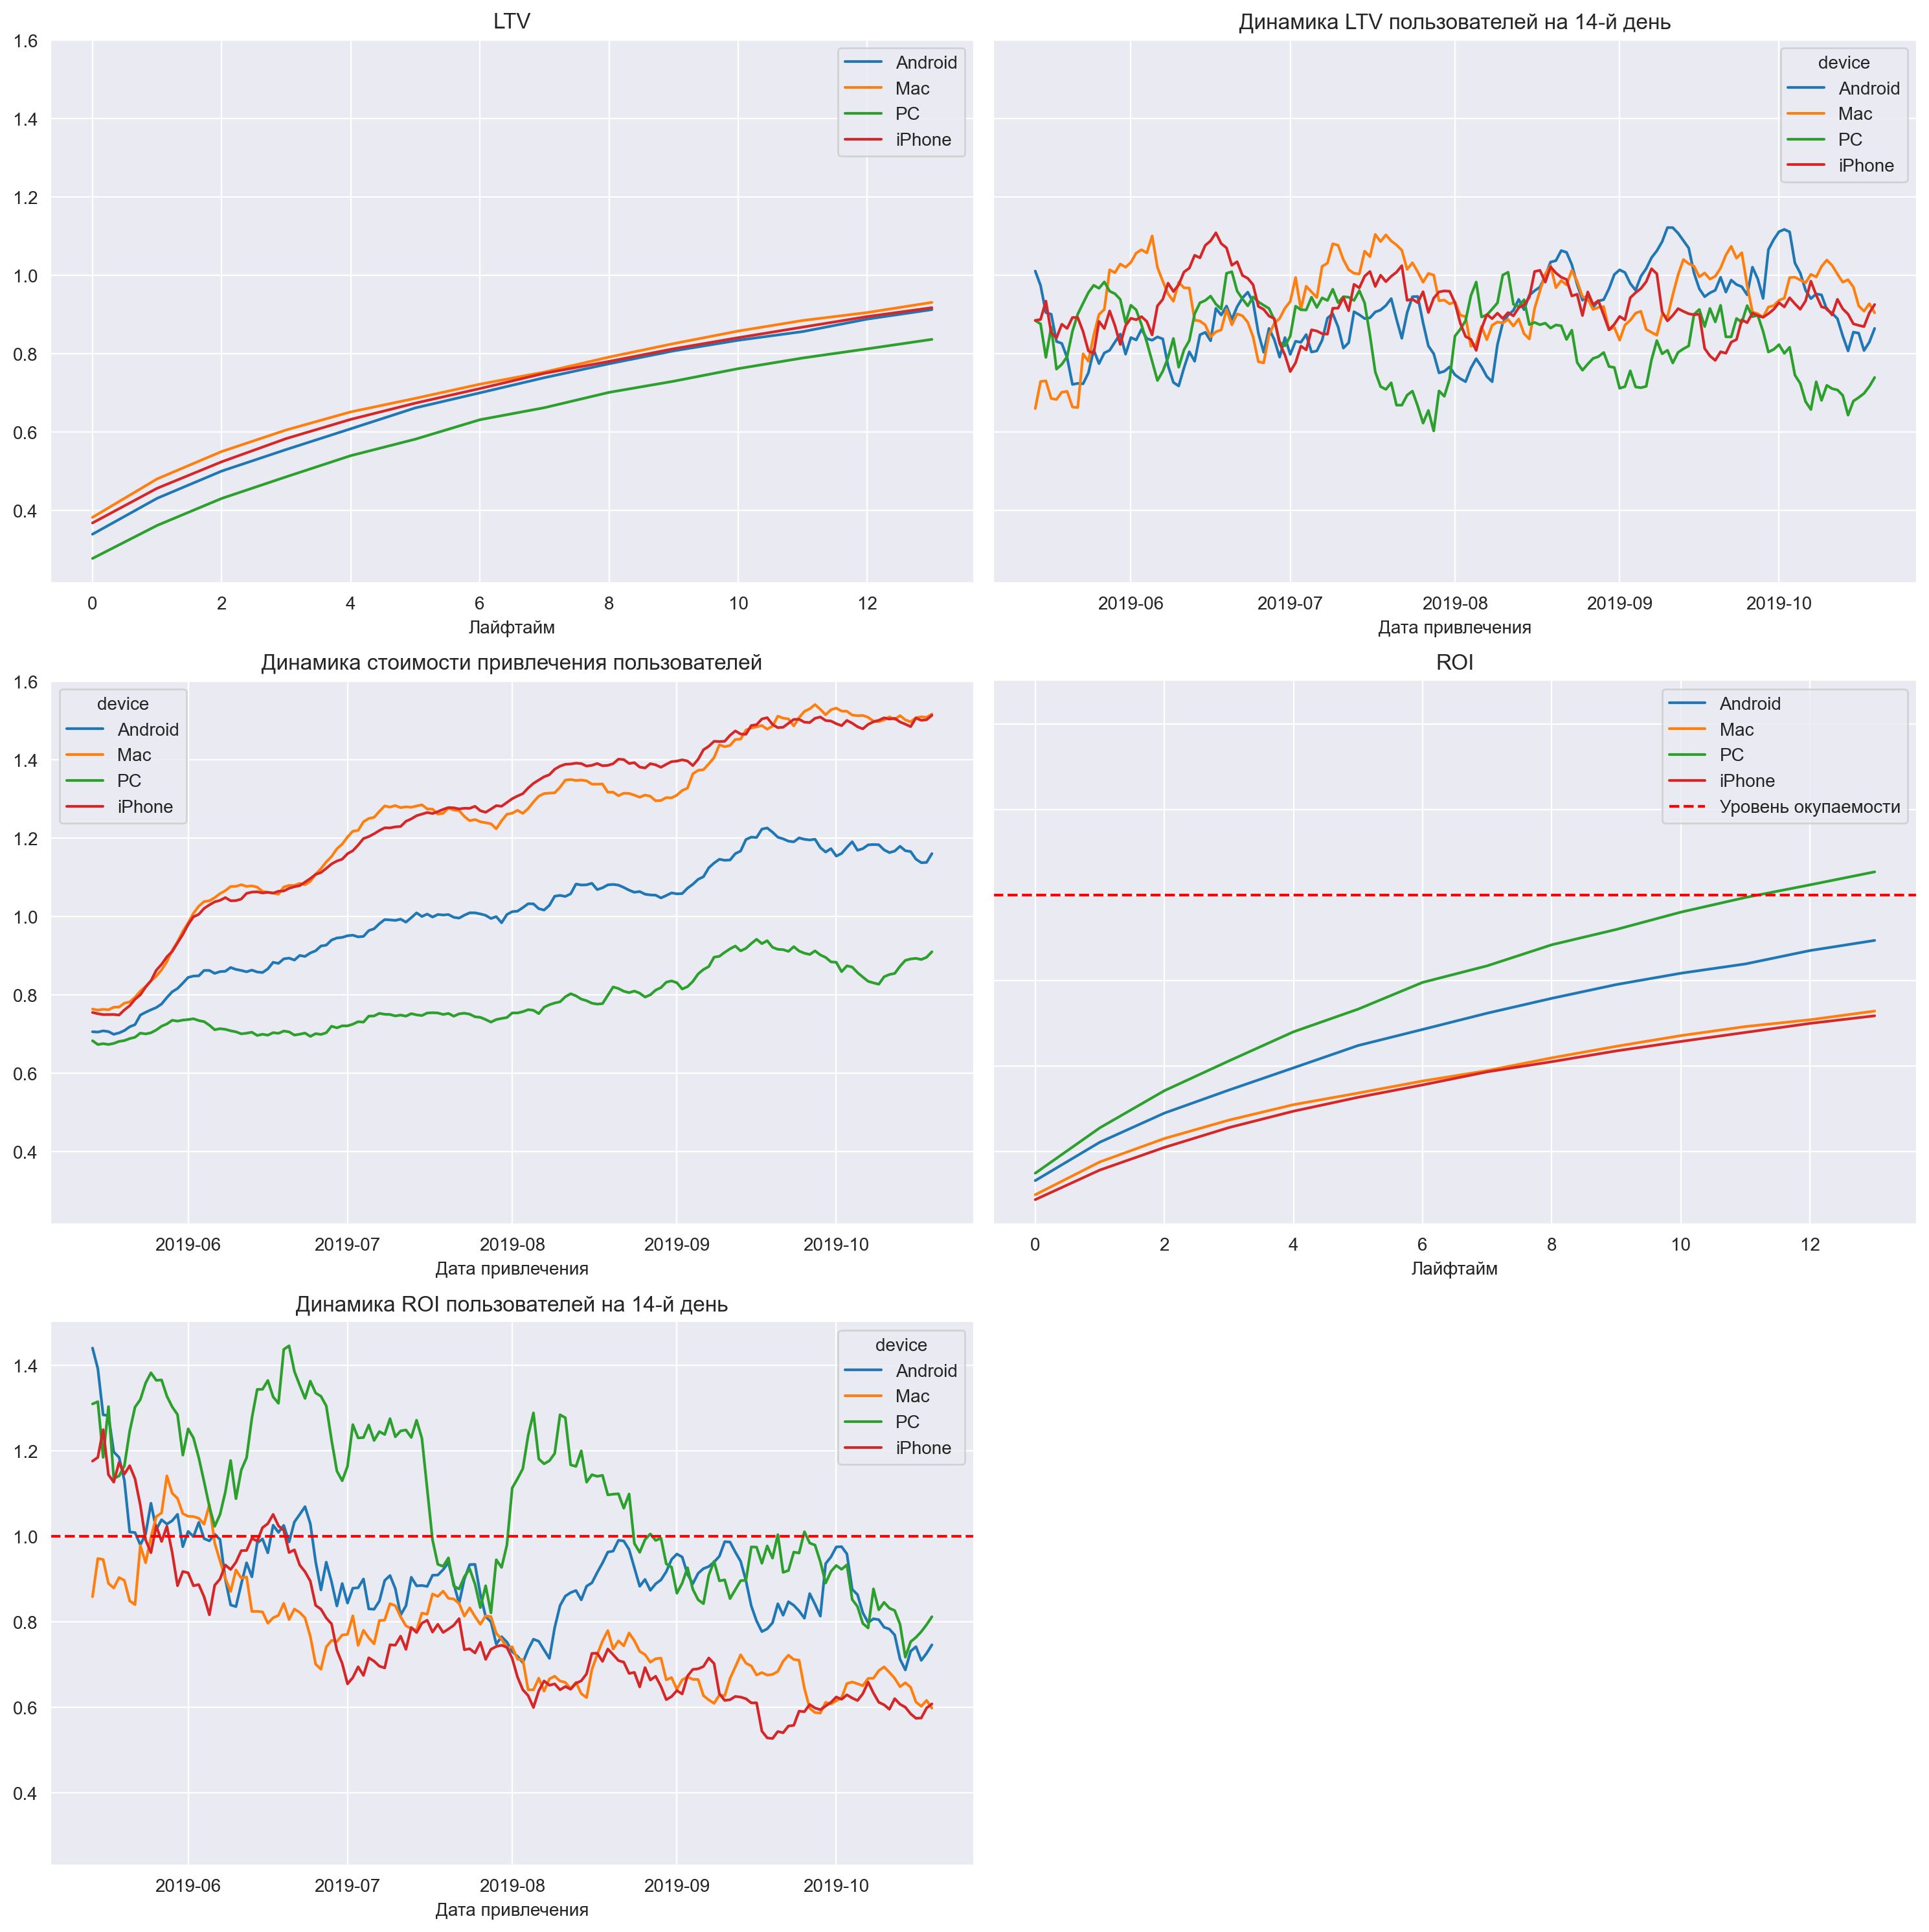

In [33]:
# окупаемость с разбивкой по устройствам

dimensions = ['device']

# расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# построение графиков
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Из всех устройств реклама окупается только на PC, что логично, т.к. стоимость привлечения клиентов на этом устройстве меньше всех остальных. При этом на графике у всех устройств наблюдается отрицательная динамика ROI пользователей.

### Окупаемость рекламы с разбивкой по странам

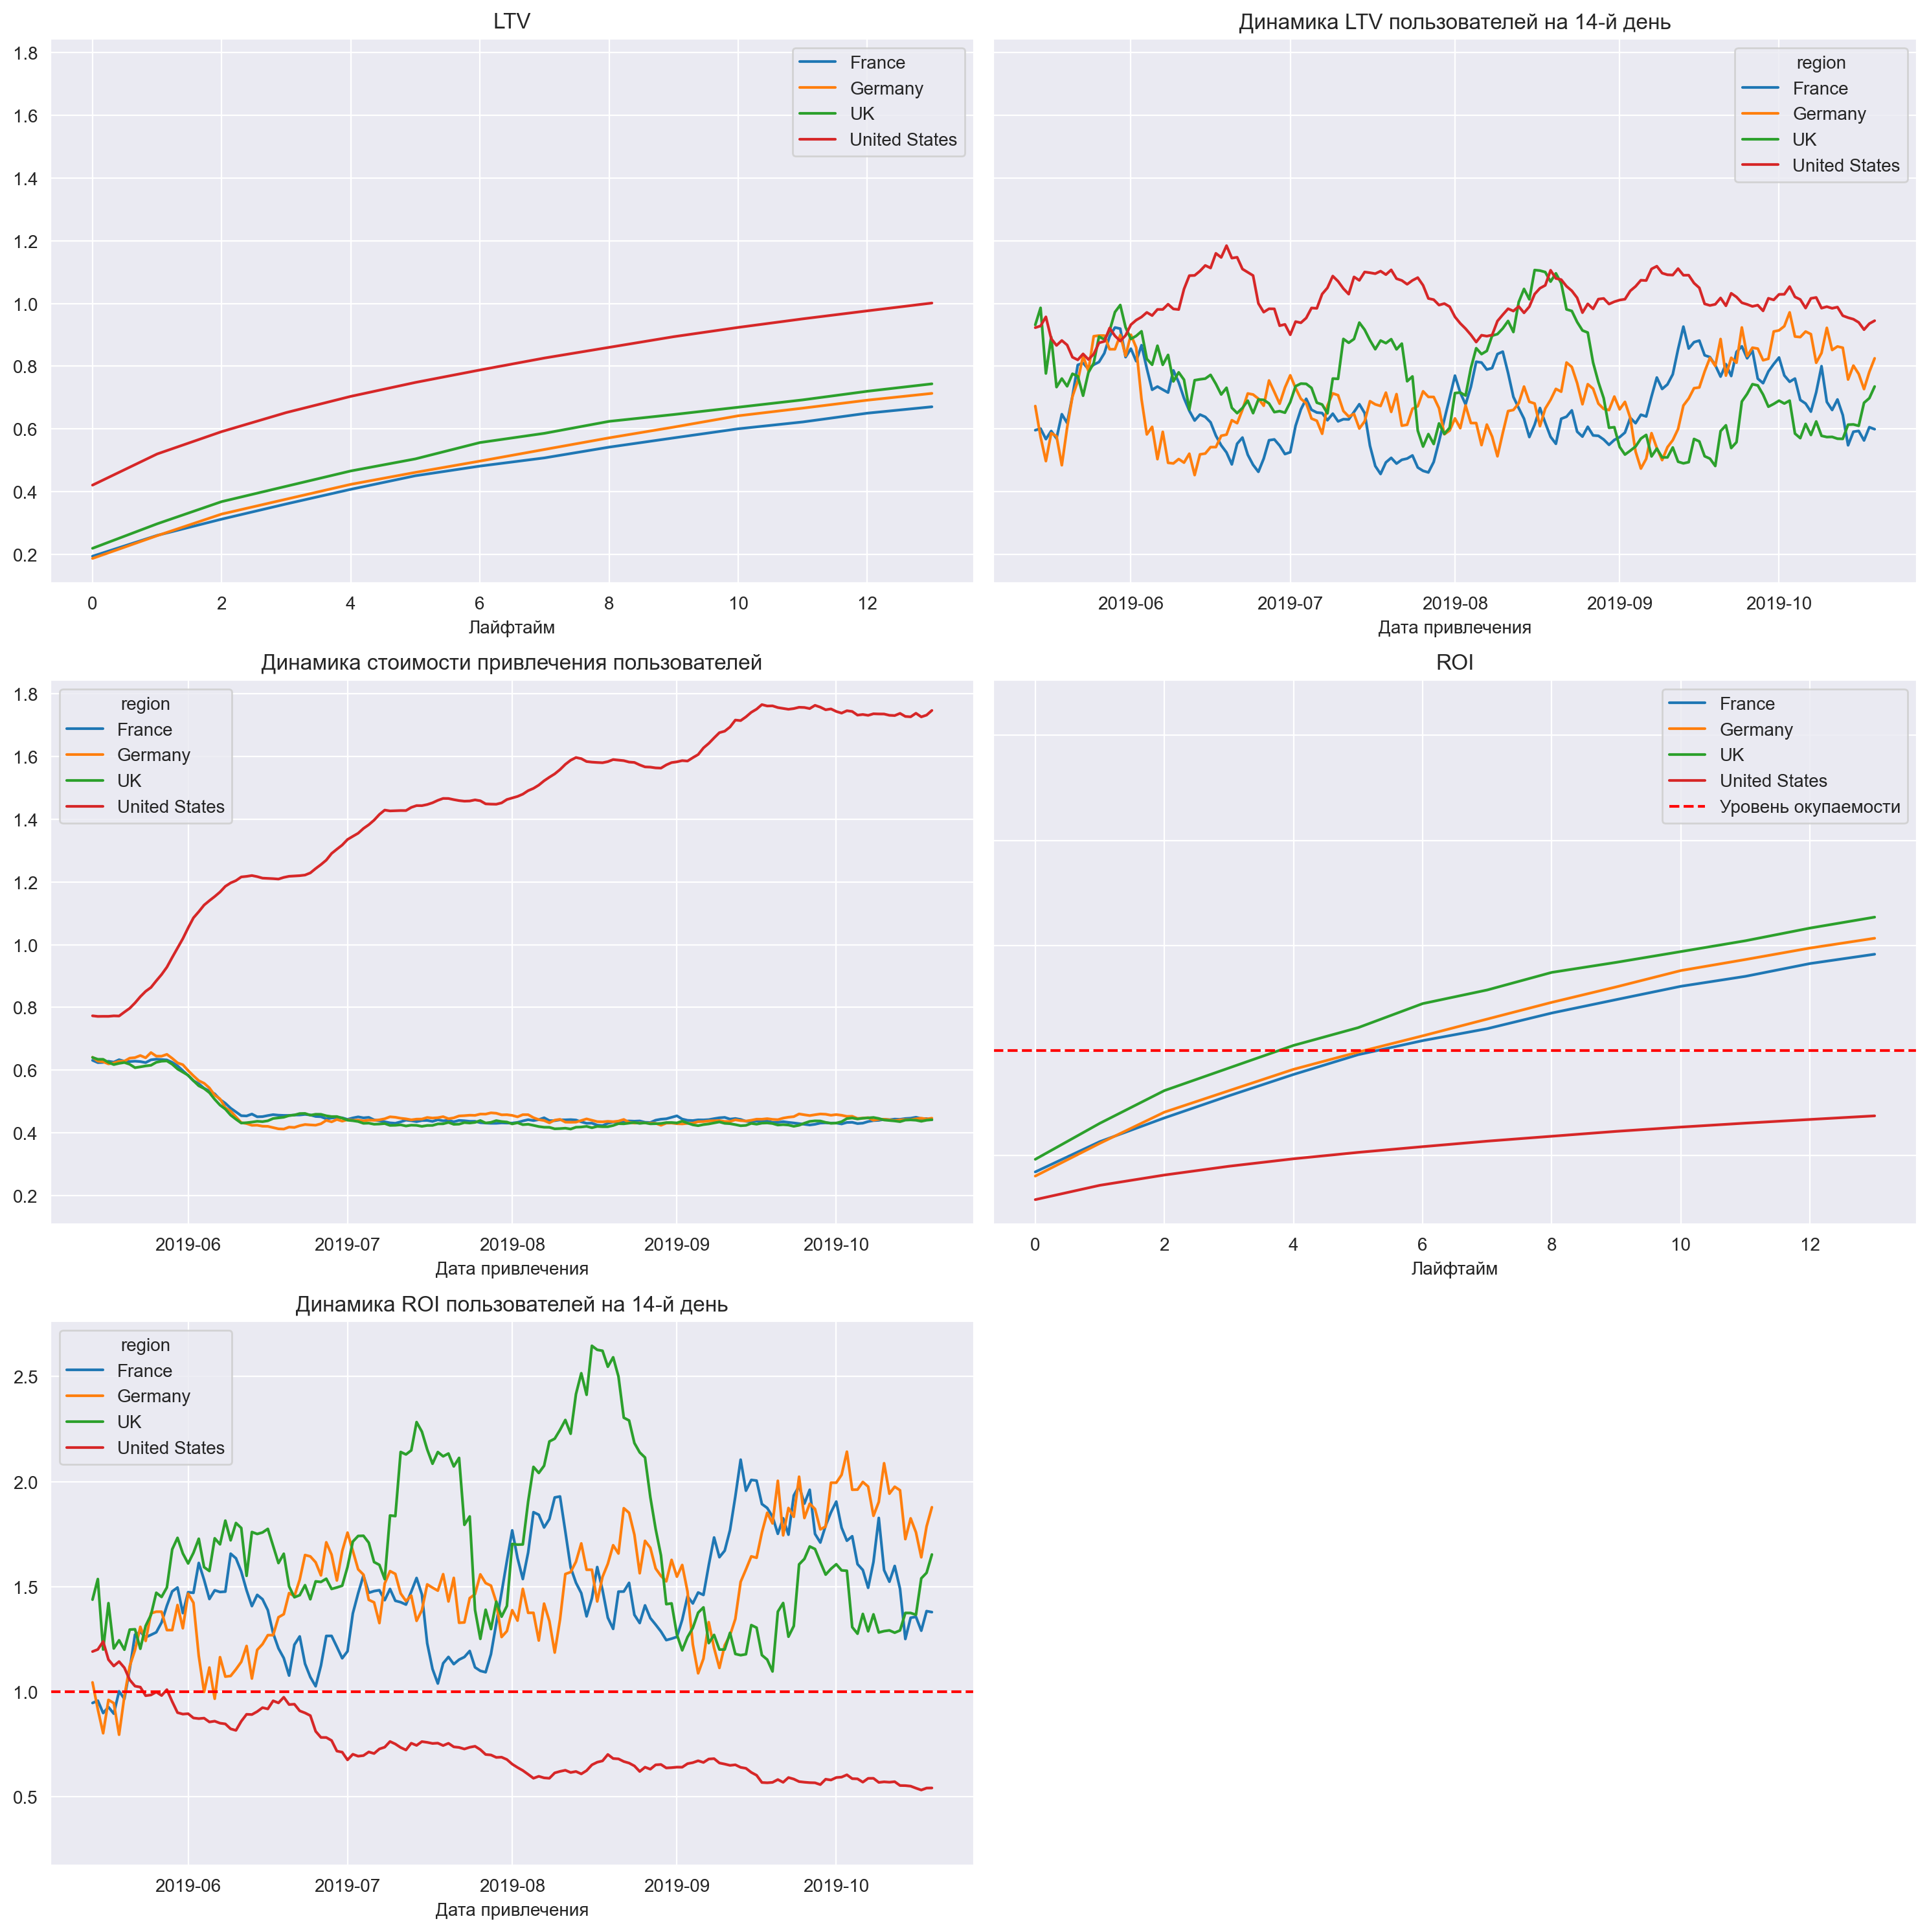

In [34]:
# окупаемость с разбивкой по странам

dimensions = ['region']

# расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# построение графиков
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

На графике сразу видно, что реклама не окупается только в США. Кроме того, мы видим колоссальную разницу в стоимости привлечения клиентов: в США она значительно выше, чем в других регионах. Динамика ROI у США так же отрицательная.

### Окупаемость рекламы с разбивкой по источникам привлечения

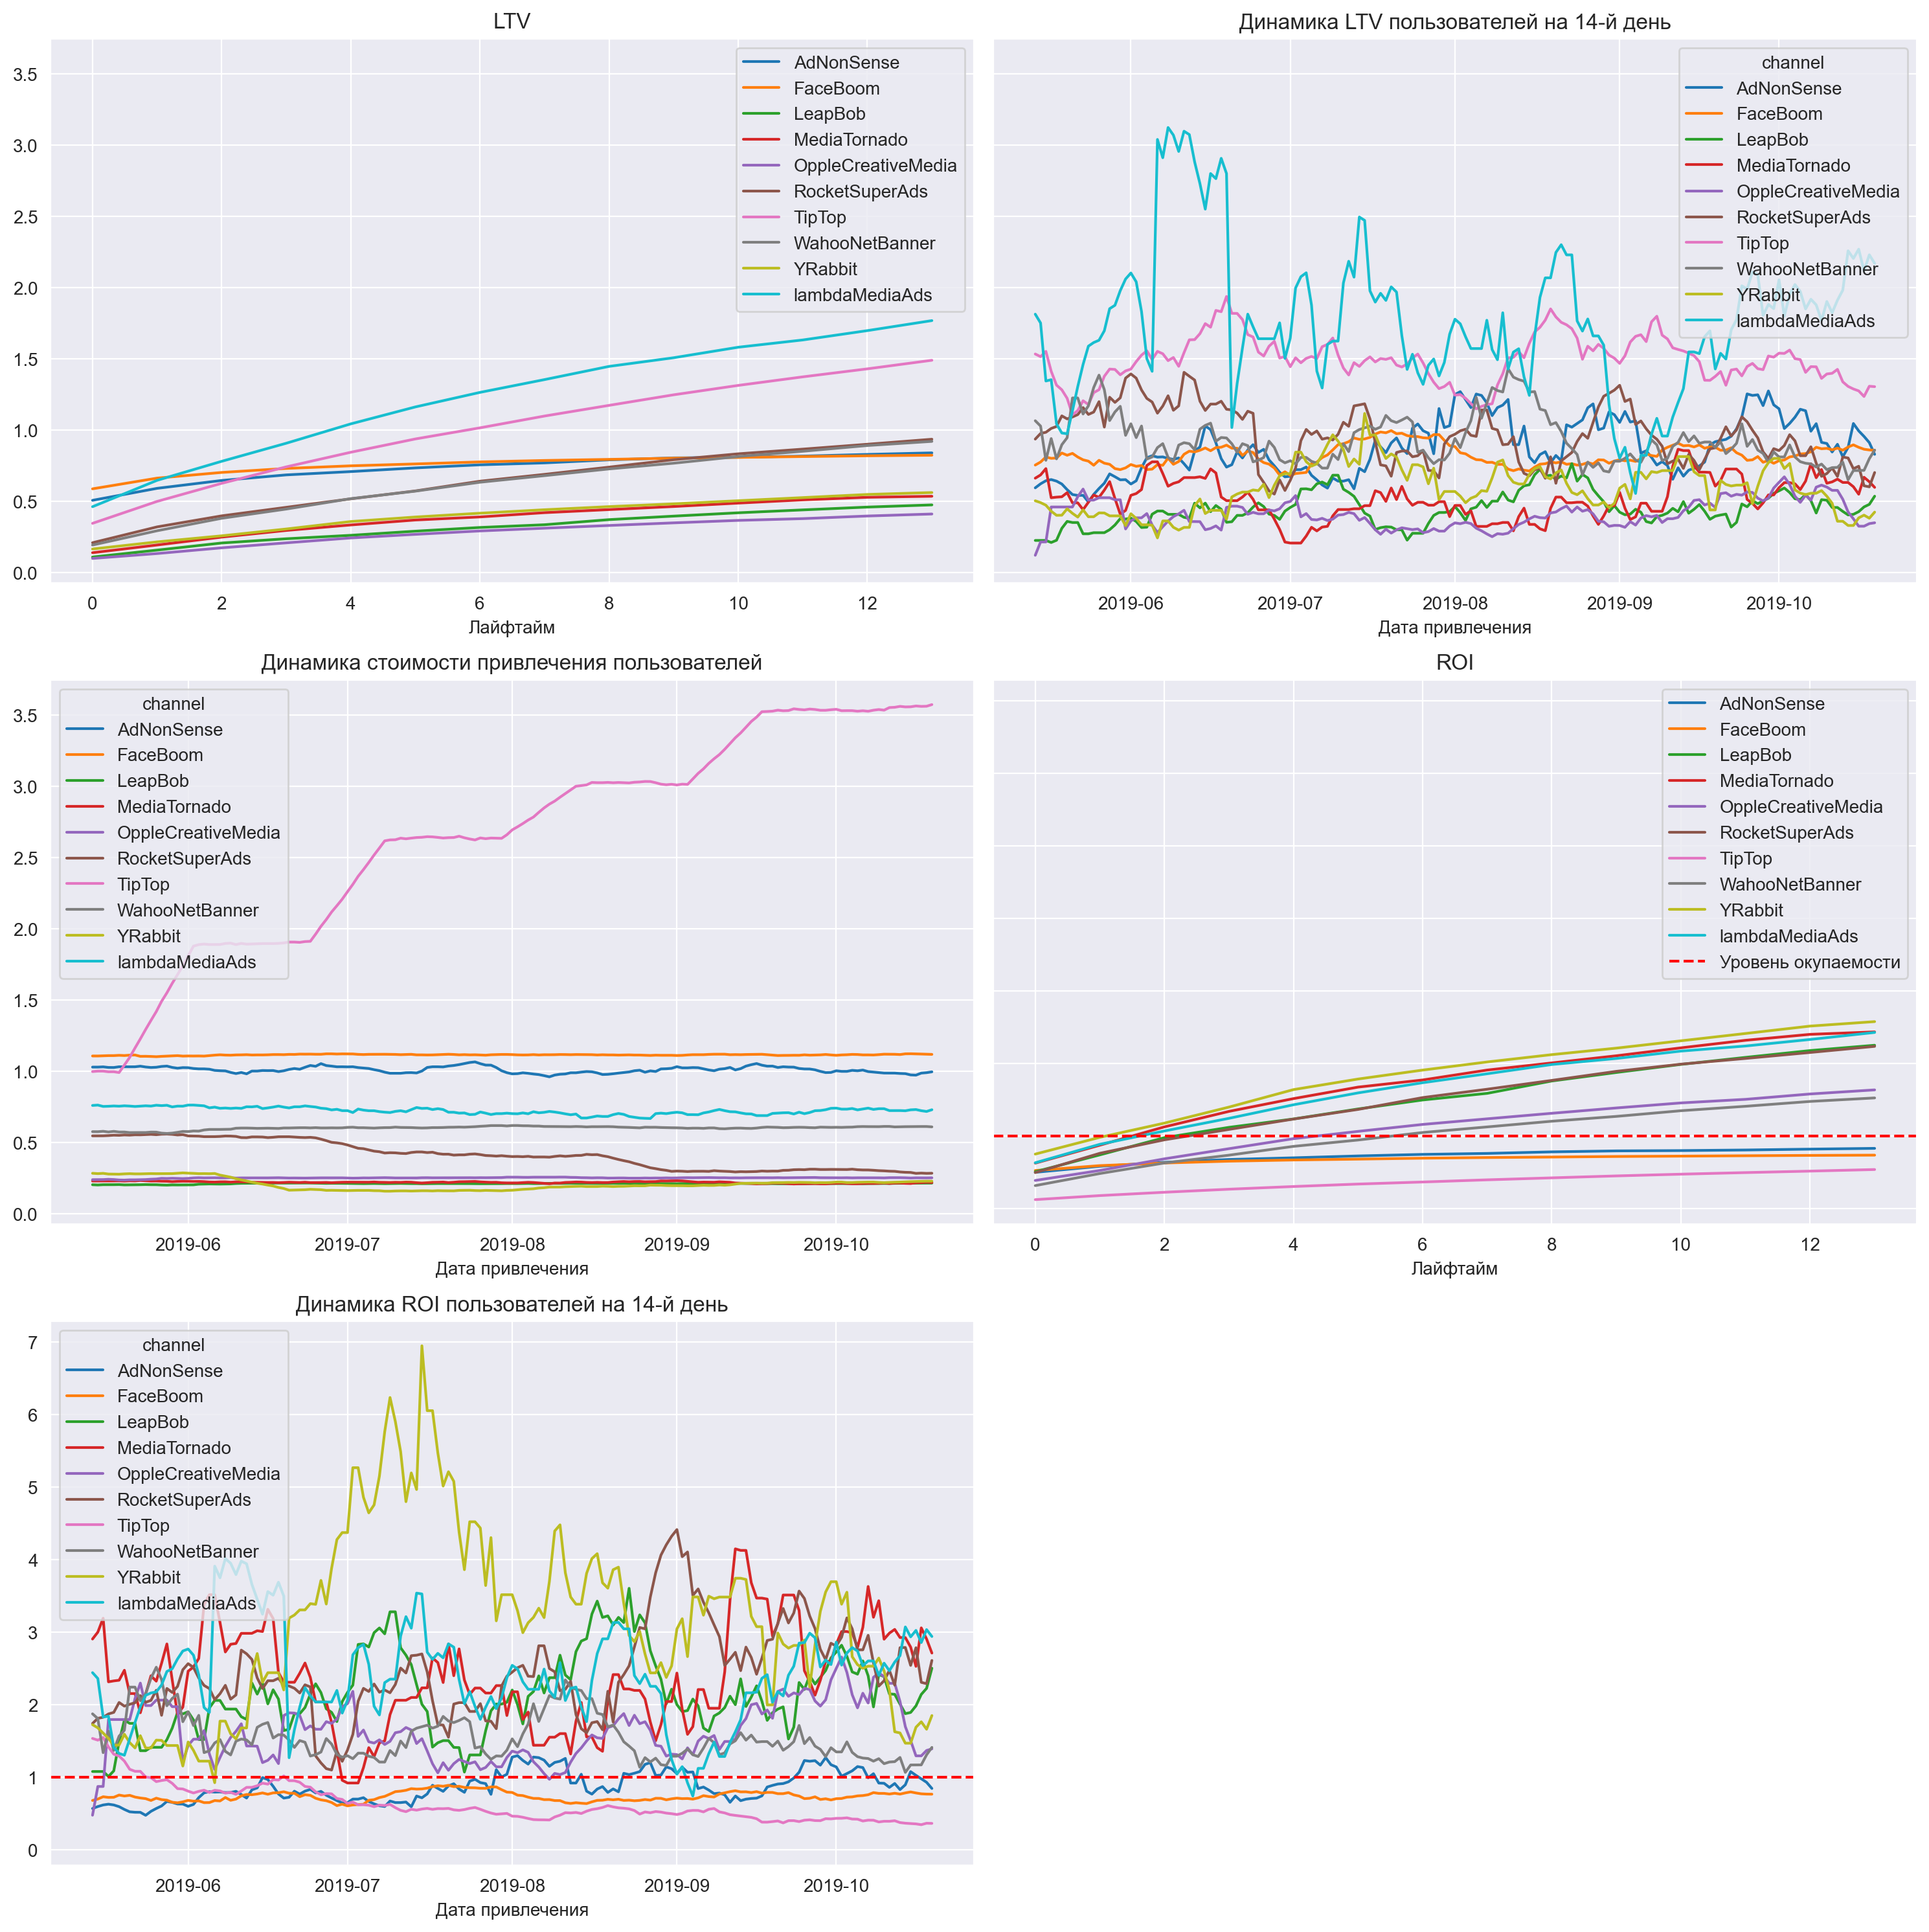

In [35]:
# окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

# расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# построение графиков
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

Из всех источников не окупаются только 3: TipTop, Faceboom и AdNonSense (стоимость привлечения которых самая высокая). Но безусловным лидером по росту CAC является TipTop. Несмотря на такие высокие затраты, реклама не окупается. 

### Конверсия и удержание с разбивкой по устройствам

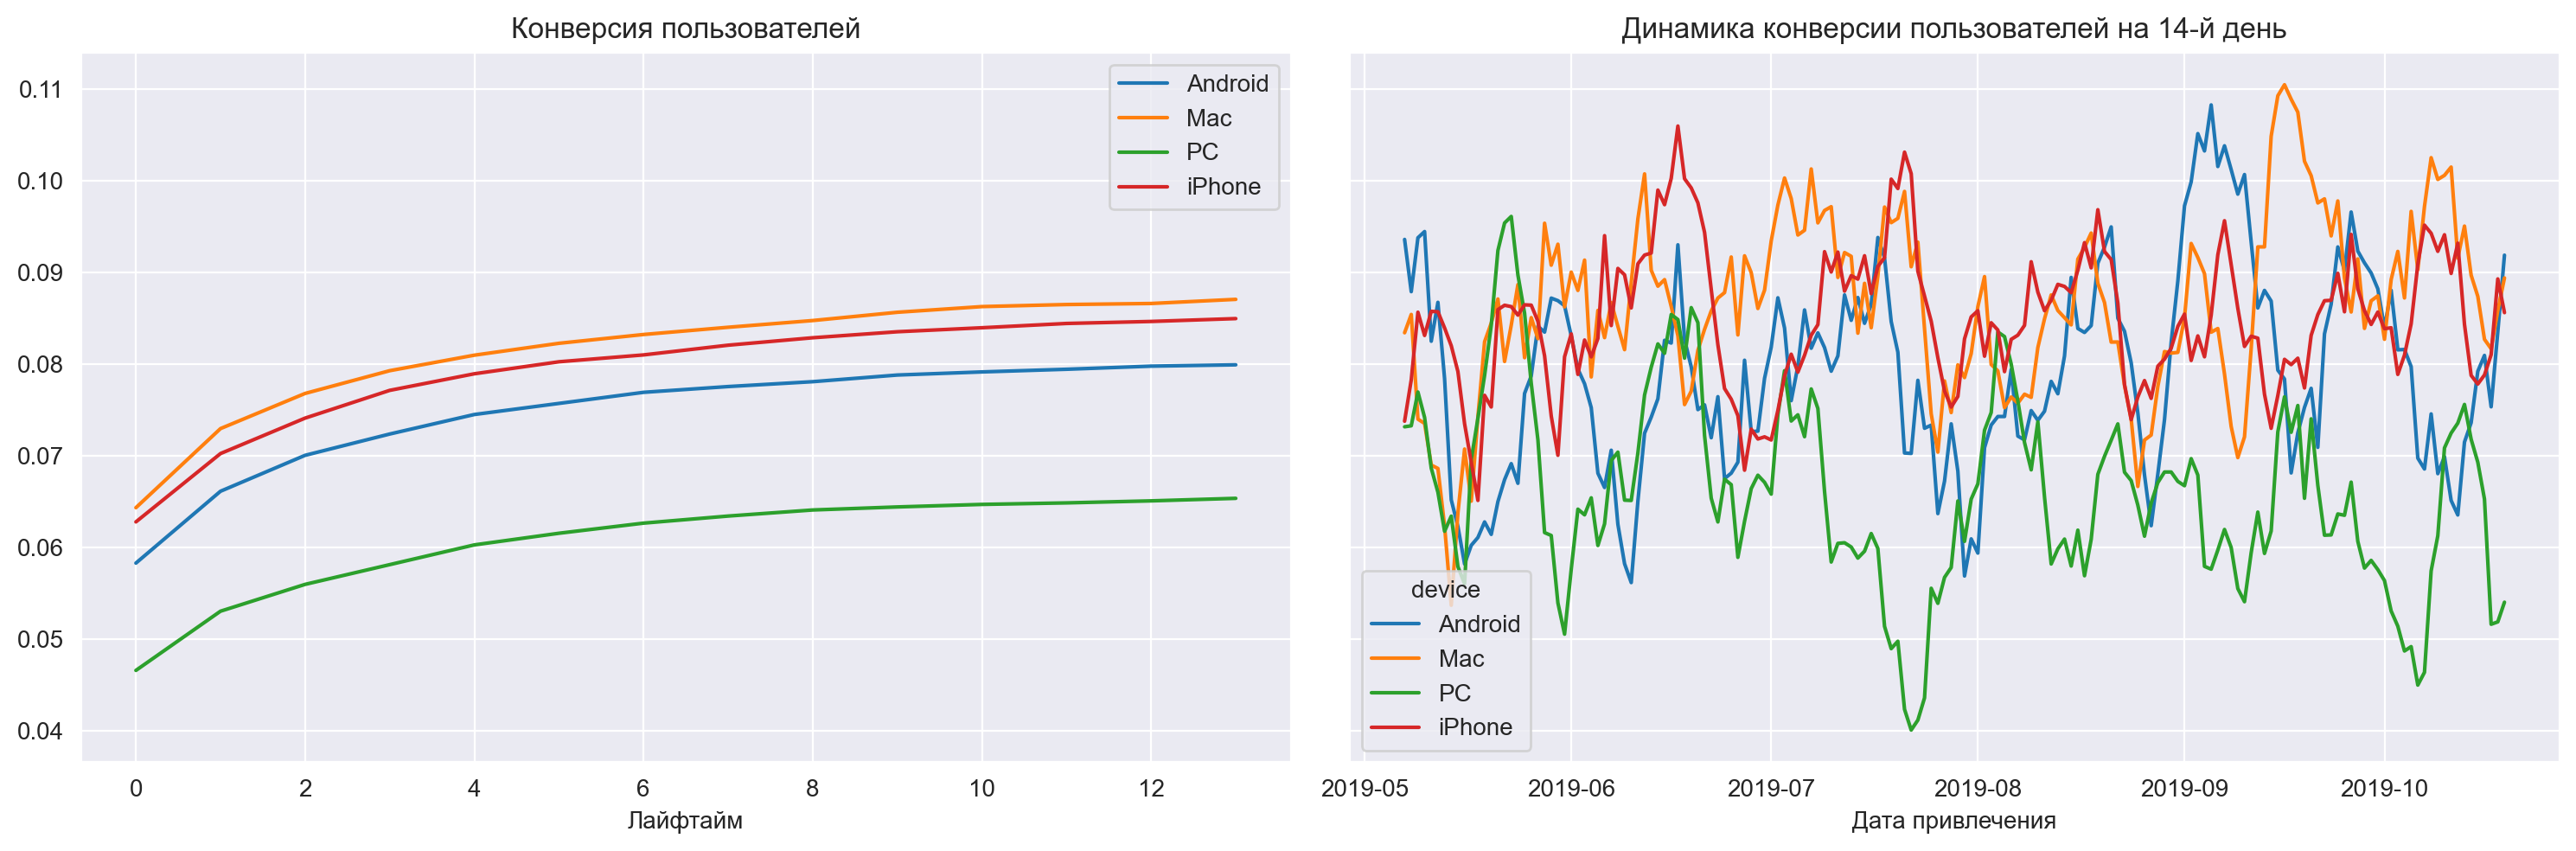

In [36]:
# конверсия с разбивкой по устройствам

dimensions = ['device']

# расчет конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# построение графиков
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самое высокое значение конверсии у пользователей Mac и iPhone, ниже всего - у пользователей PC.

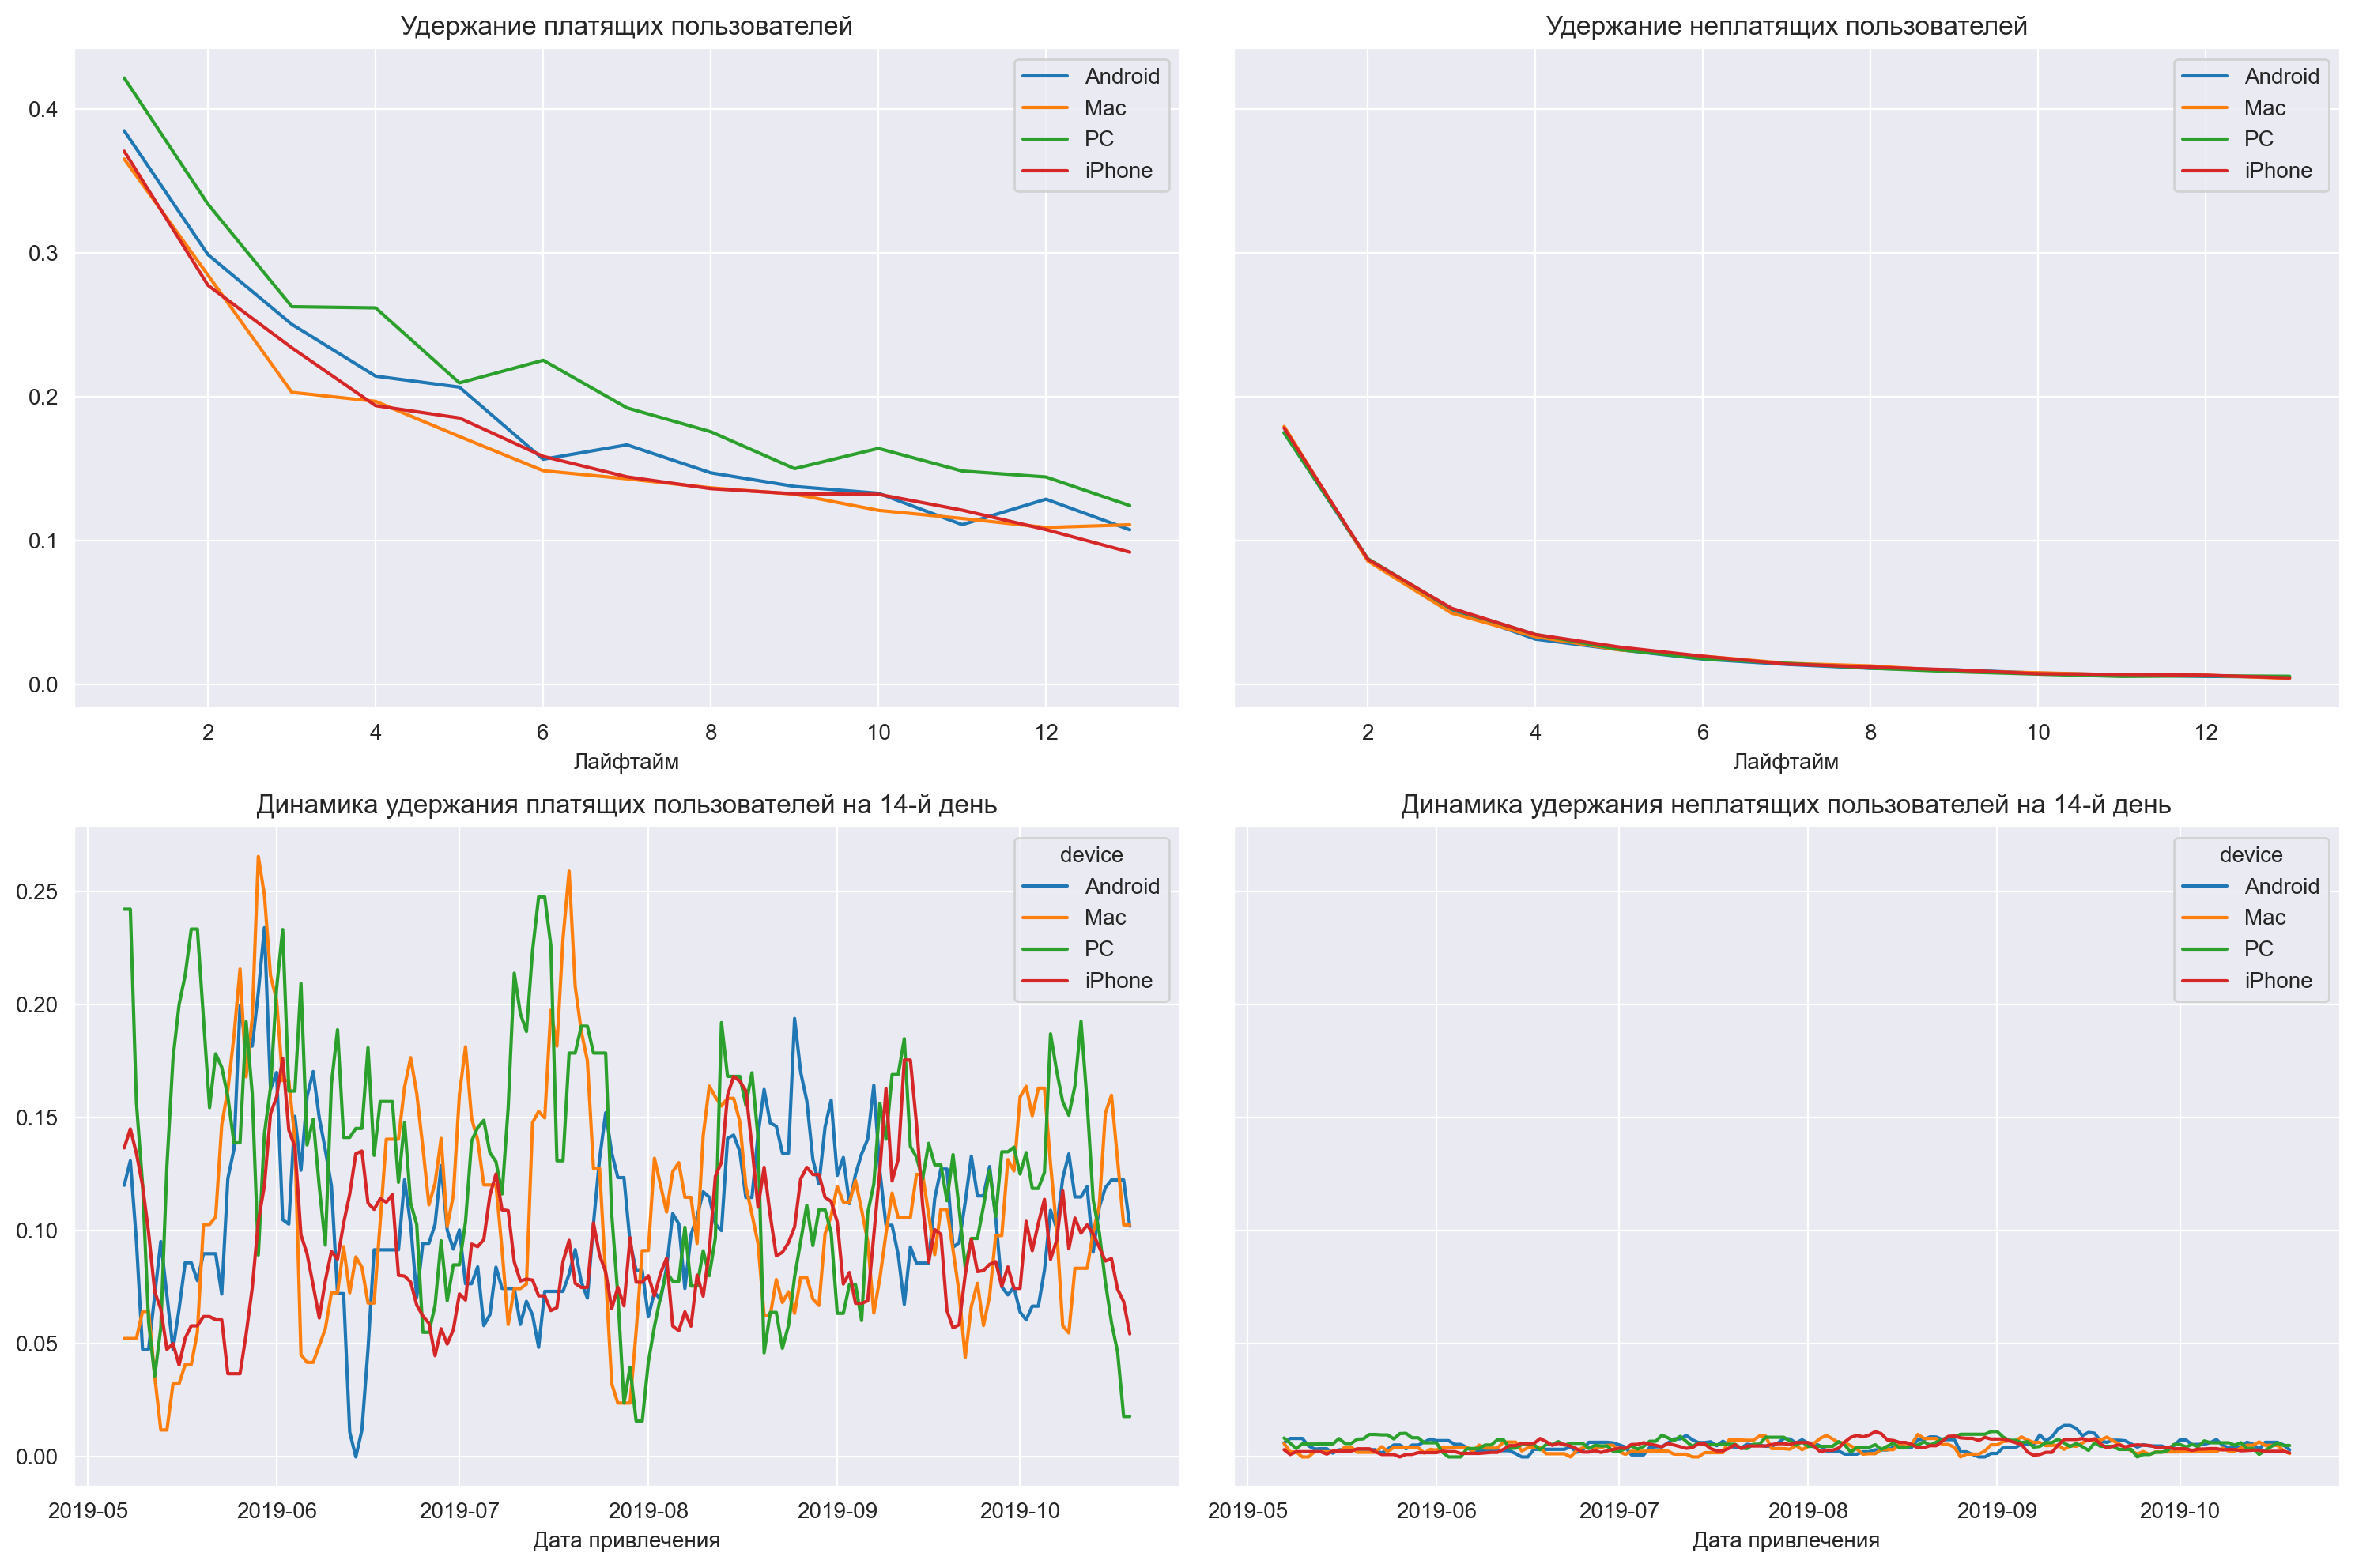

In [37]:
# удержание с разбивкой по устройствам

# расчет удержания
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

# построение графиков
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание выше всего у пользователей PC, но незначительно.

### Конверсия и удержание с разбивкой по странам

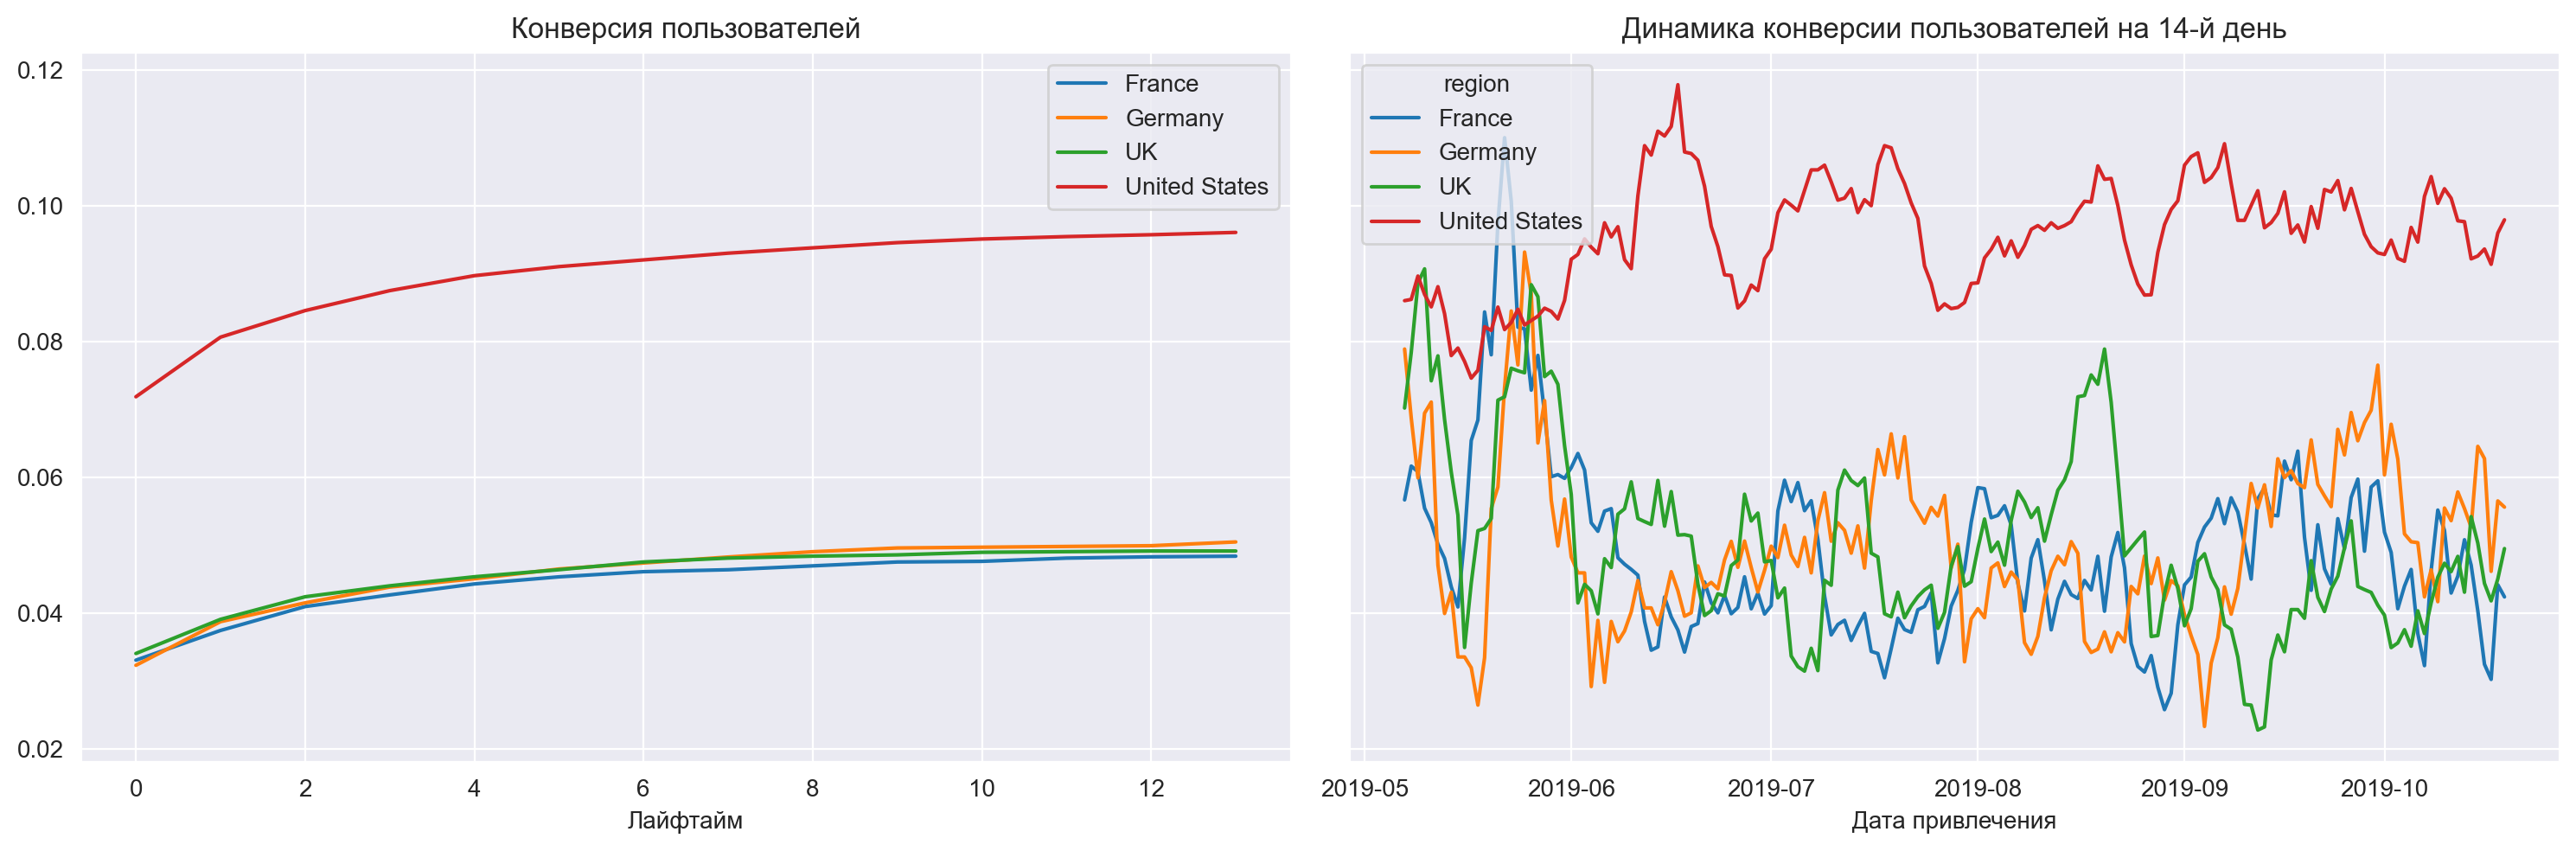

In [38]:
# конверсия с разбивкой по странам

dimensions = ['region']

# расчет конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# построение графиков
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей США значительно выше конверсии пользователей других регионов.

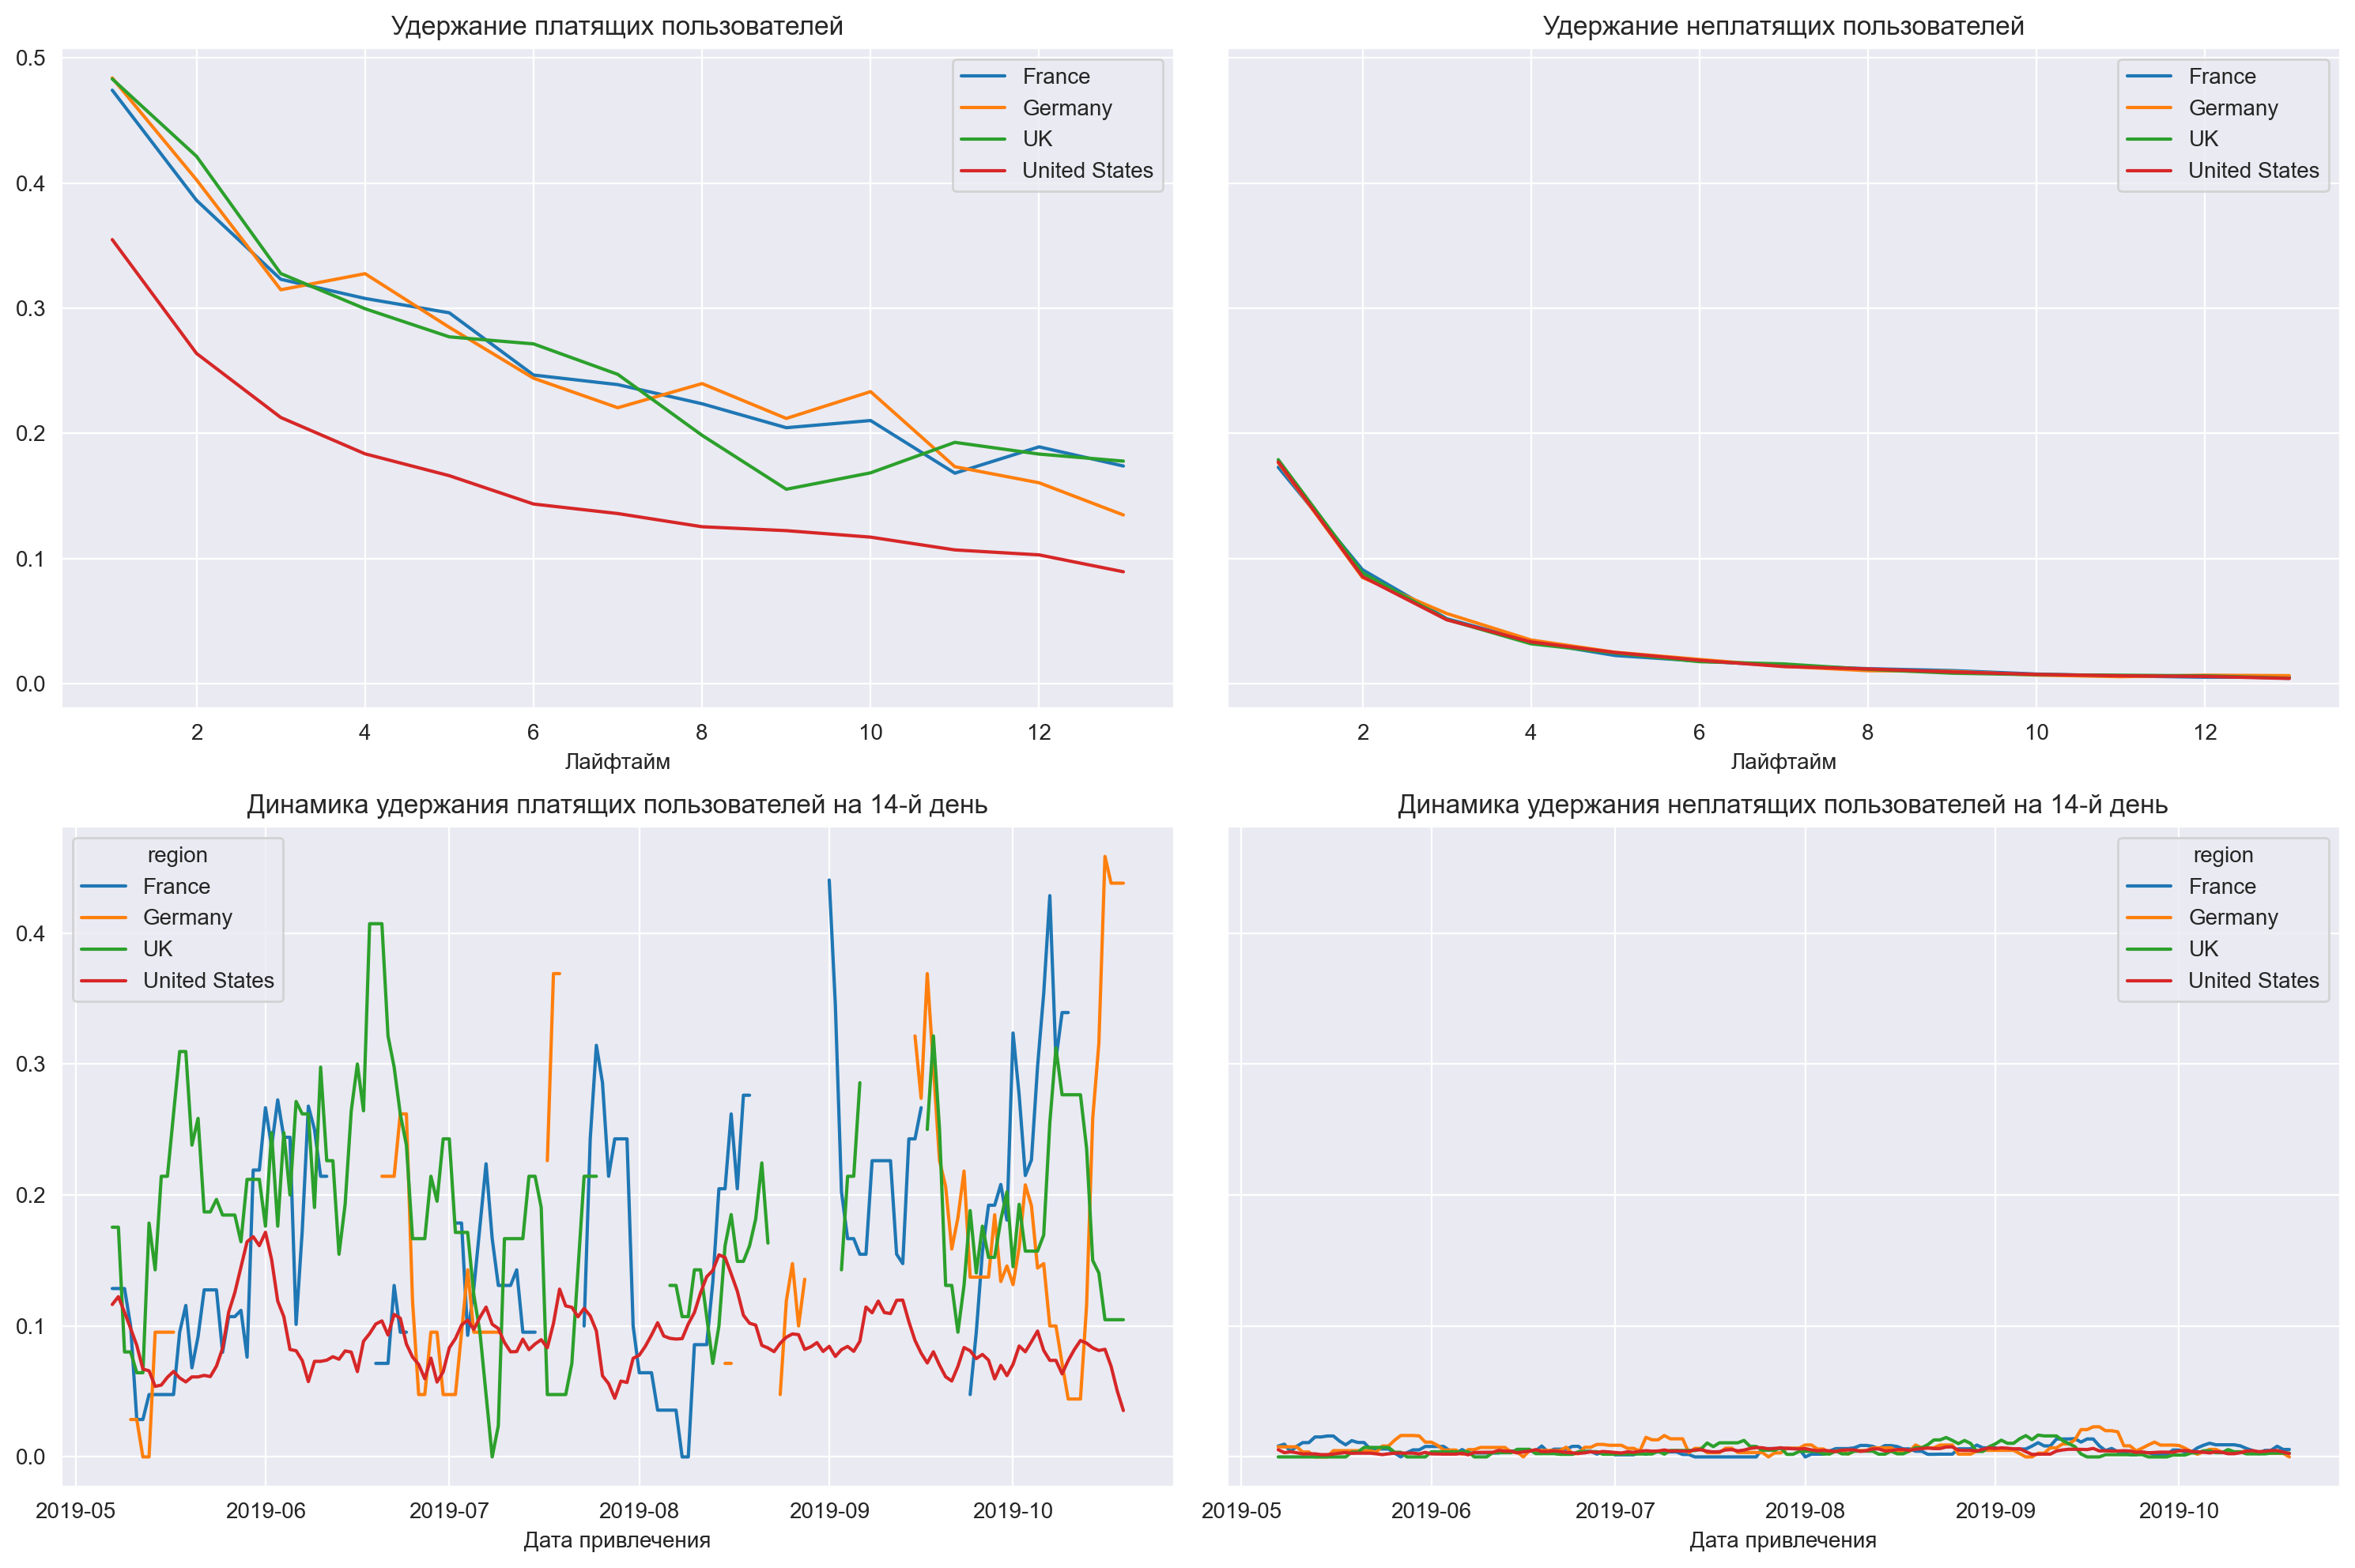

In [39]:
# удержание с разбивкой по странам

# расчет удержания
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

# построение графиков
plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей из Франции, Германии и Великобритании находится примерно на одном уровне, тогда как у пользователей из США значение удержания существенно ниже.

### Конверсия и удержание с разбивкой по рекламным каналам

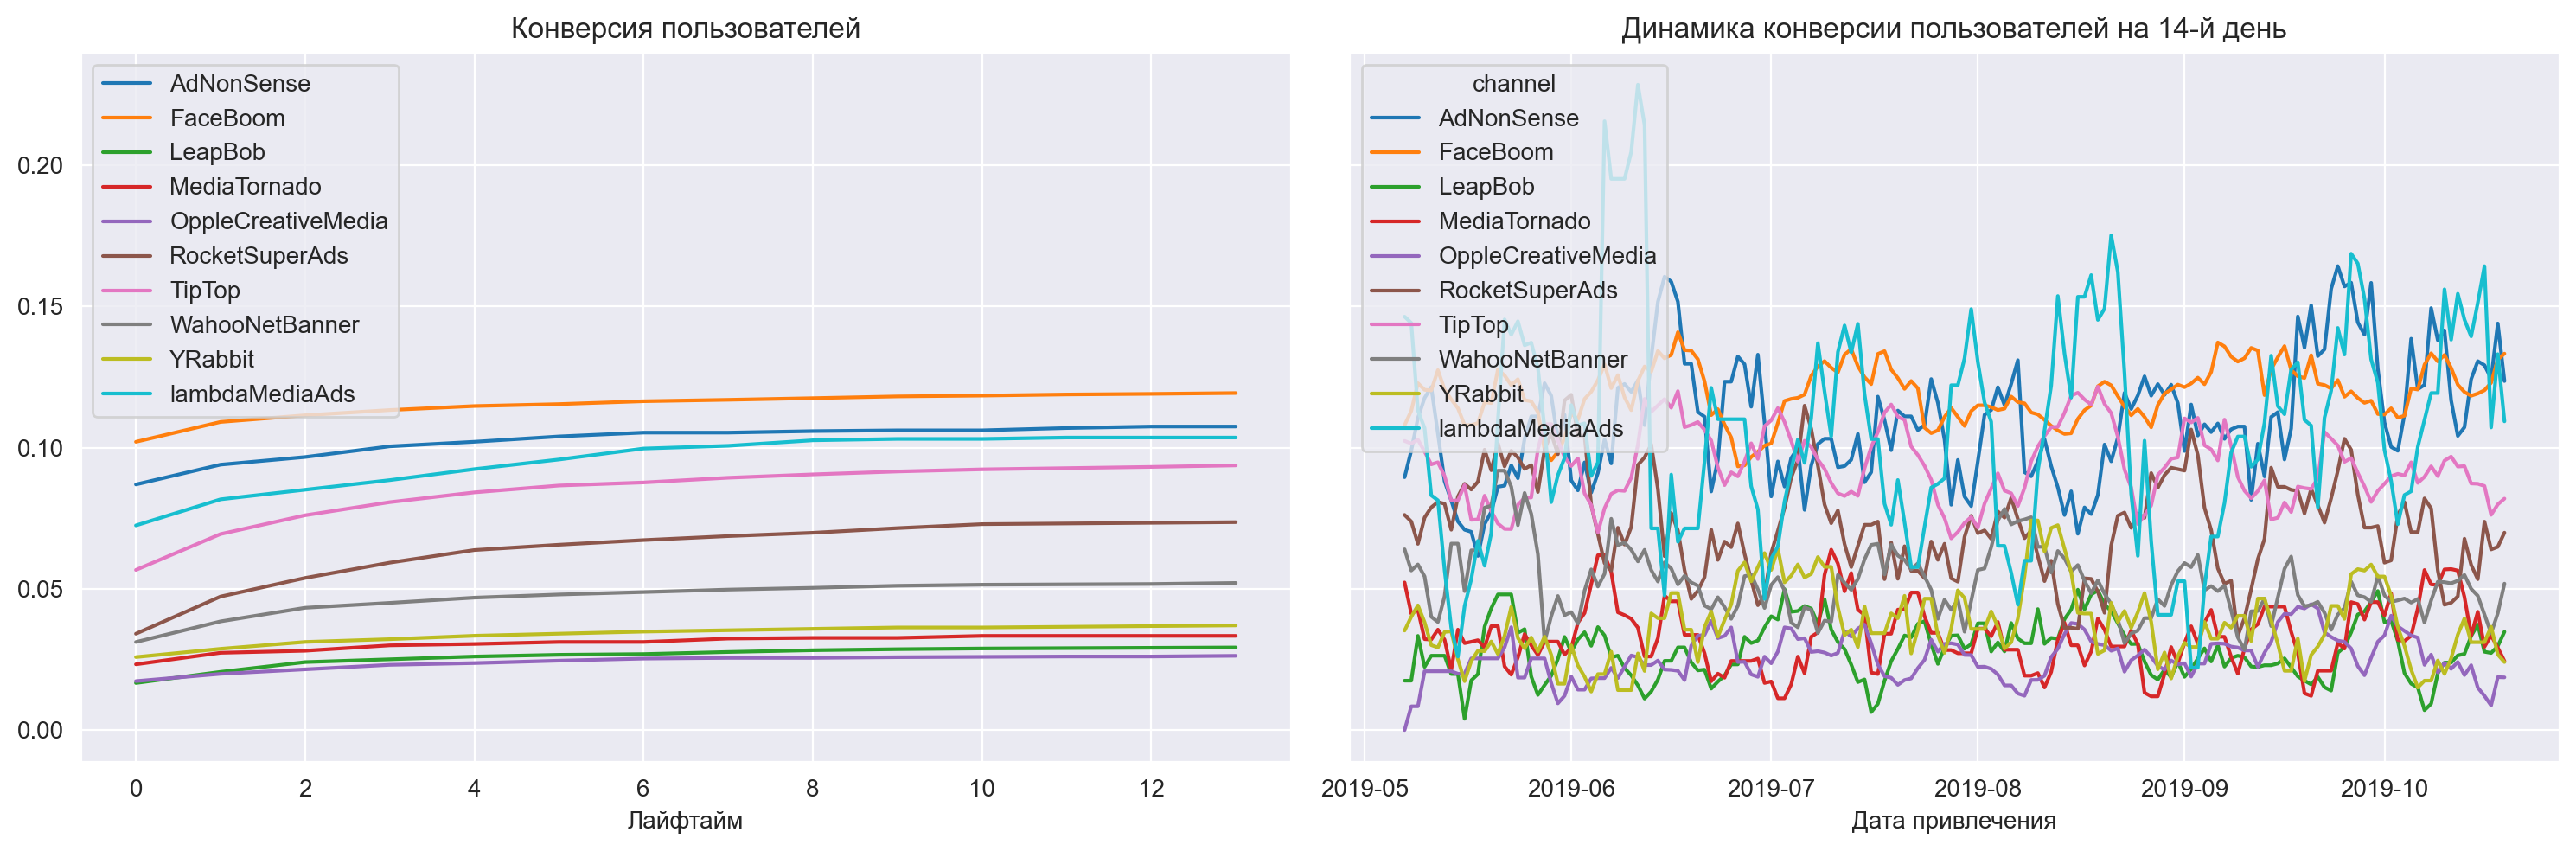

In [40]:
# конверсия с разбивкой по рекламным каналам

dimensions = ['channel']

# расчет конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, horizon_days, dimensions=dimensions)

# построение графиков
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Выше всего конверсия у пользователей, привлеченных с помощью канала Faceboom.

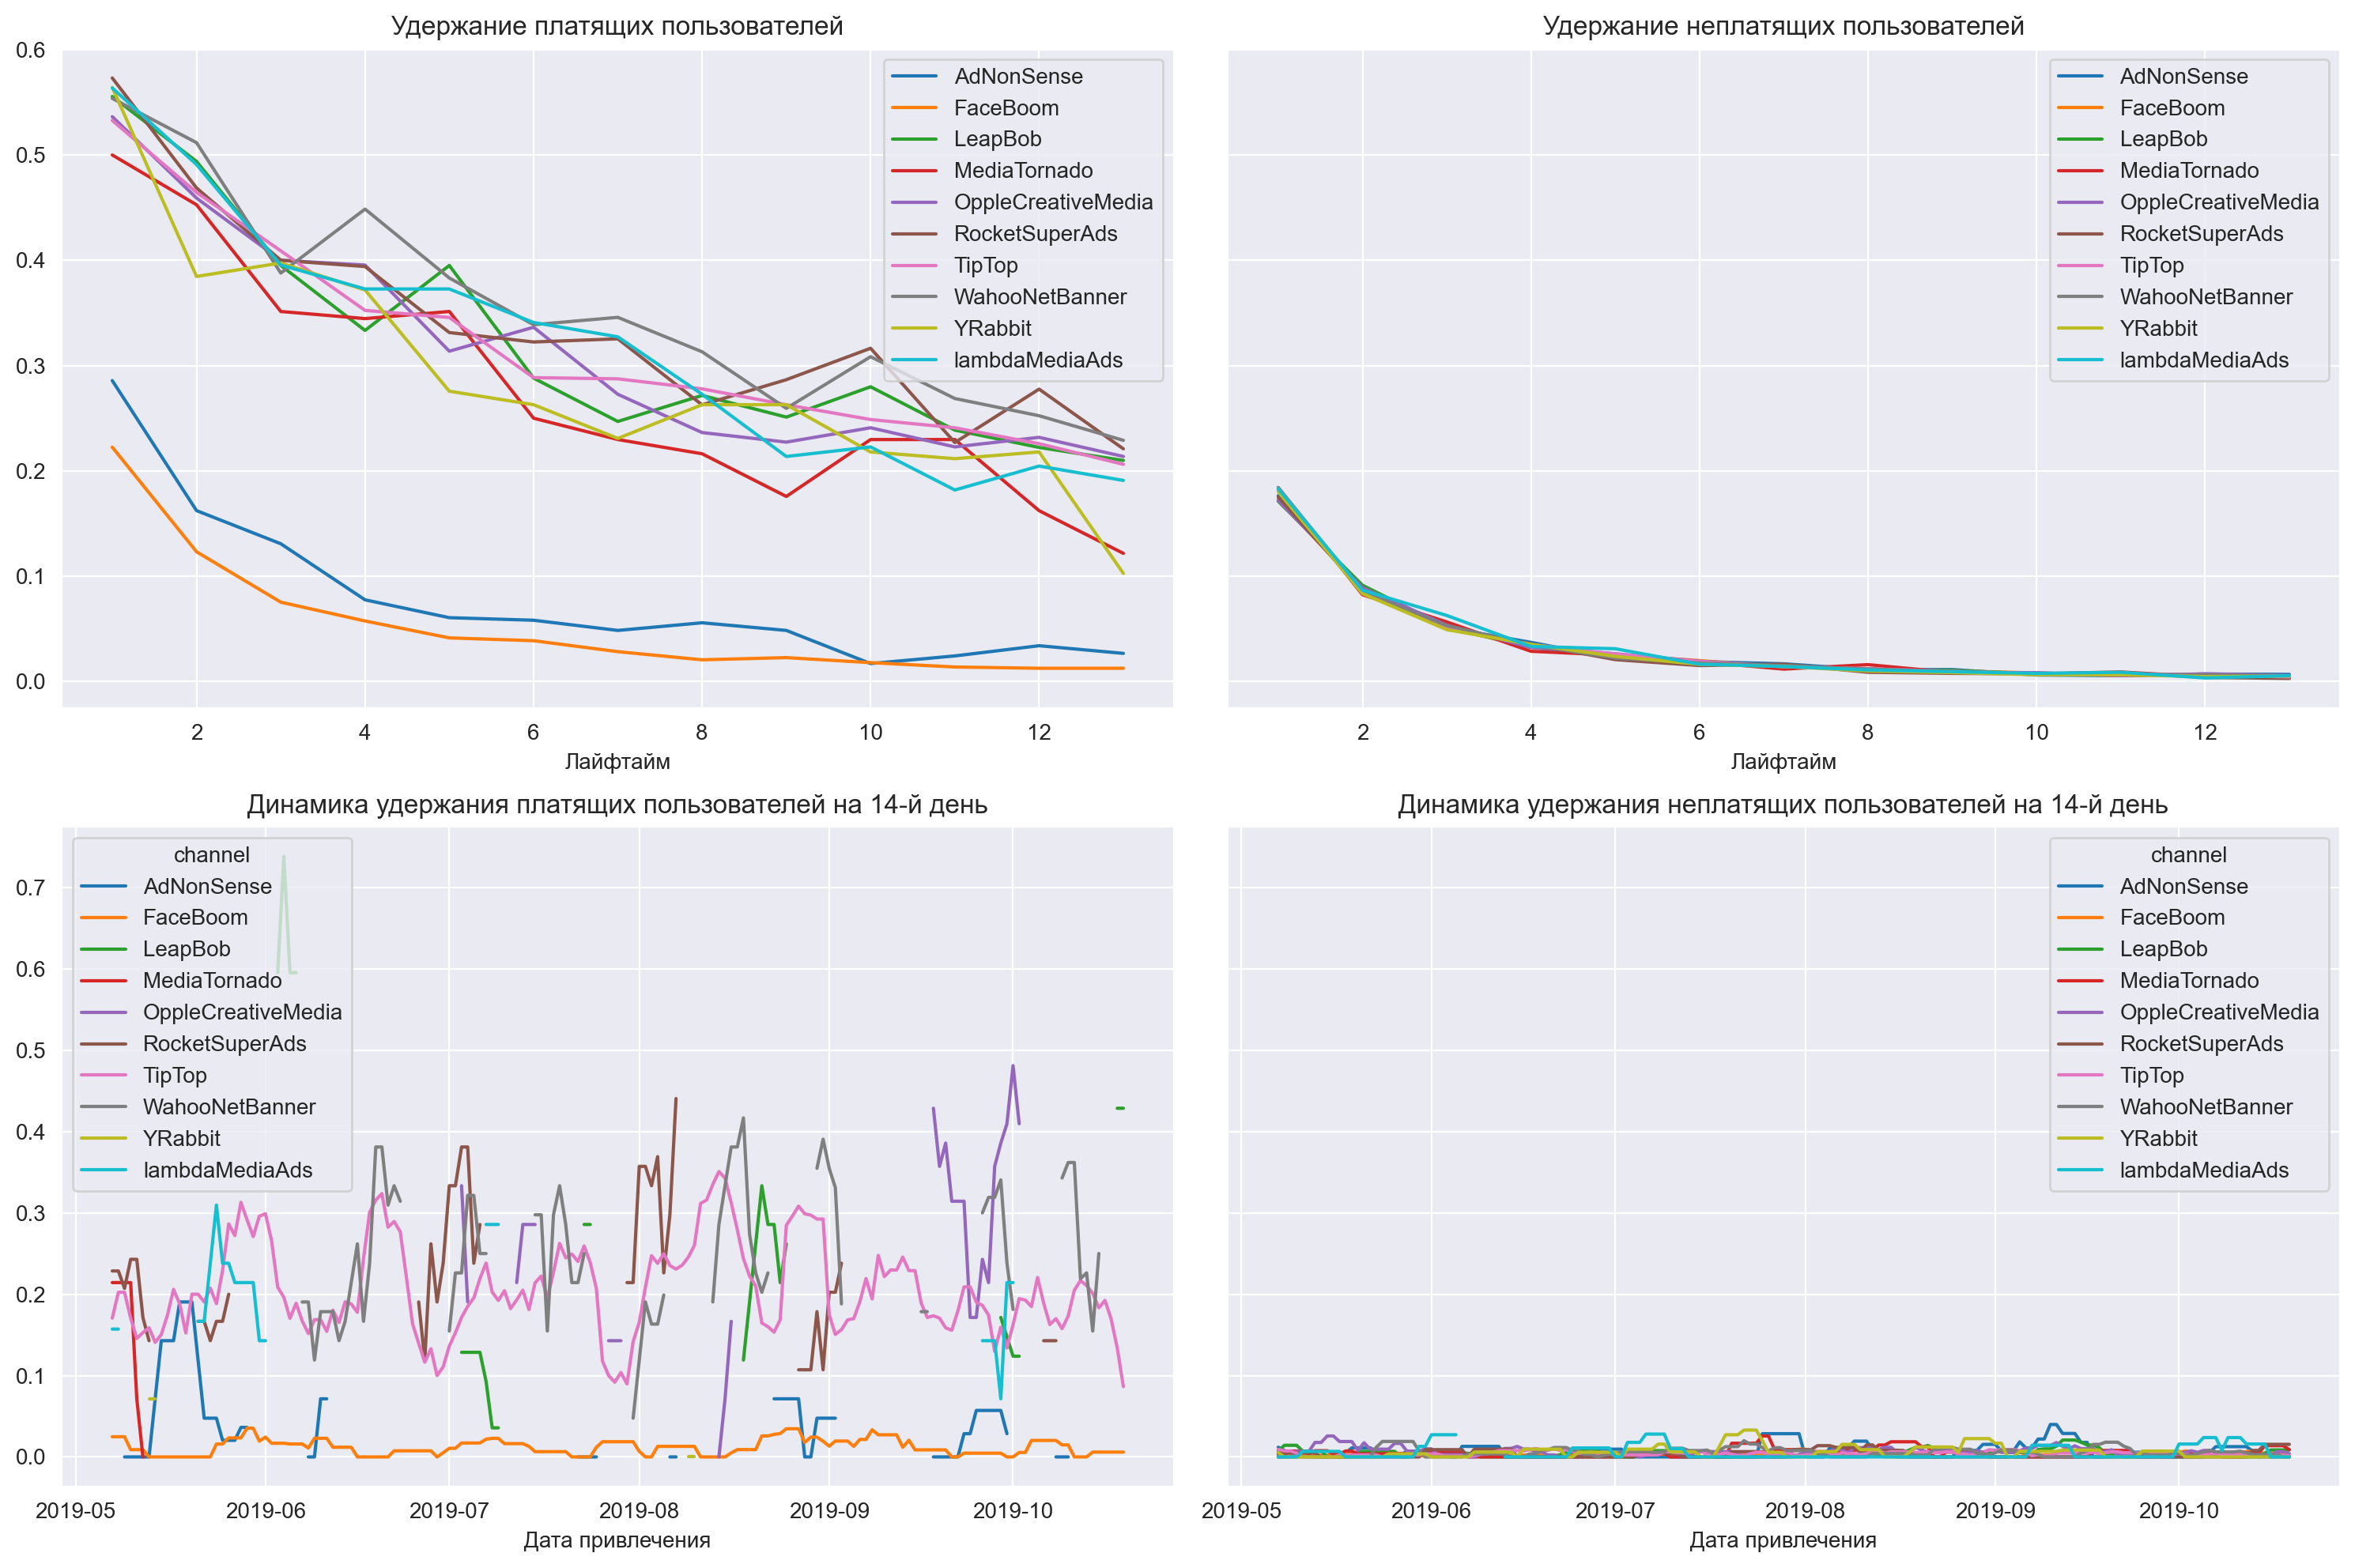

In [41]:
# удержание с разбивкой по рекламным каналам

# расчет удержания
retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, horizon_days, dimensions=dimensions)

# построение графиков
plot_retention(retention_grouped, retention_history, horizon_days)

Уровень удержания пользователей у рекламных источников Faceboom и AdNonSense значительно ниже других.

Итак, по итогам данного раздела можно сделать выводы, что, в целом, реклама, направленная на привлечение пользователей, не окупается.

Негативное влияние на окупаемость рекламы оказывают: 
- США, как единственная страна, в которой не окупается реклама, кроме того, есть проблема удержания платящих пользователей из данной страны;
- устройства Apple, реклама на которых окупается хуже всего, при этом их расходы на привлечение клиентов на порядок выше всех остальных представленных устройств; 
- неокупающиеся рекламные каналы TipTop, Faceboom и AdNonSense (стоимость привлечения которых при этом самая высокая).

### Общий вывод

В ходе изучения общей информации о датафреймах были обнаружены неверные типы данных некоторых столбцов, несоответствующие правильному стилю названия столбцов. Дубликаты и пропущенные значения обнаружены не были. Также, был определены: перечень стран, из которых пользователи приходят в приложение: США, Великобритания, Германия и Франция, и список устройств клиентов: iPhone, Android, PC и Mac. 

Во время предобработки данных были исправлены типы данных столбцов для корректной работы с датой и временем, а также названия столбцов для удобства работы.

В ходе исследовательского анализа данных были составлены профили пользователей, определены минимальная и максимальная даты привлечения пользователей, проанализированы количество пользователей и доля платящих для каждой страны, каждого устройства и каждого канала привлечения.

Также была рассчитана общая сумма расходов на маркетинг, проанализировано распределение расходов по рекламным источникам и стоимость привлечения одного пользователя для каждого источника. Кроме того, была проанализирована окупаемость рекламы с разбивкой по устройствам, странам и рекламным источникам.

По результатам можно сделать ряд выводов:
- лидером по количеству пользователей и по доле платящих пользователей являются США и устройства компании Apple;
- через канала "organic" пришло cамое большое количество пользователей, но большая часть именно платящих пользователей была привлечена через рекламный канал FaceBoom;
- самыми дорогими каналами привлечения являются TipTop (больше 50% от общей суммы расходов) и FaceBoom;
- стоимость привлечения пользователей с каждым месяцем растет, но при этом реклама не окупается;
- из всех устройств реклама окупается только на PC;
- США является единственной страной, в которой не окупается реклама, при этом стоимость привлечения клиентов в данной стране в несколько раз выше, чем в других регионах. Кроме того, существует проблема с удержанием платящих пользователей этой страны;
- из десяти рекламных источников не окупаются TipTop, Faceboom и AdNonSense, при этом уровень удержания пользователей у Faceboom и AdNonSense значительно ниже других.

Рекомендации:
- имеет смысл сократить расходы на такие рекламные источники, как TipTop, Faceboom, которые не окупаются, несмотря на высокие значения стоимости привлечения пользователя;
- увеличить финансирование и сделать акцент на такие источники привлечения, как YRabbit, MediaTornado и lambdaMediaAds, которые имеют довольно высокие значения окупаемости и удержания пользователей.